### Linear Regression With Time Series

In [1]:
import pandas as pd
import numpy as np
from warnings import simplefilter
simplefilter('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [2]:
data = pd.read_csv('book_sales.csv')
data.head()

Date  Paperback  Hardcover
0  2000-04-01        199        139
1  2000-04-02        172        128
2  2000-04-03        111        172
3  2000-04-04        209        139
4  2000-04-05        161        191

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       30 non-null     object
 1   Paperback  30 non-null     int64 
 2   Hardcover  30 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 848.0+ bytes


In [4]:
data.Date = pd.to_datetime(data.Date, dayfirst=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       30 non-null     datetime64[ns]
 1   Paperback  30 non-null     int64         
 2   Hardcover  30 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 848.0 bytes


In [6]:
data.set_index('Date', inplace=True)

In [7]:
data.head()

Paperback  Hardcover
Date                            
2000-04-01        199        139
2000-04-02        172        128
2000-04-03        111        172
2000-04-04        209        139
2000-04-05        161        191

In [8]:
data['time'] = np.arange(len(data.index))

In [9]:
data.head()

Paperback  Hardcover  time
Date                                  
2000-04-01        199        139     0
2000-04-02        172        128     1
2000-04-03        111        172     2
2000-04-04        209        139     3
2000-04-05        161        191     4

In [10]:
plt.style.use('seaborn-whitegrid')
plt.rc(
    'figure',
    autolayout = True,
    figsize = (11,4),
    titlesize = 18,
    titleweight = 'bold',
)
plt.rc(
    'axes',
    labelweight = 'bold',
    labelsize = 'large',
    titleweight = 'bold',
    titlesize = 16,
    titlepad = 10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

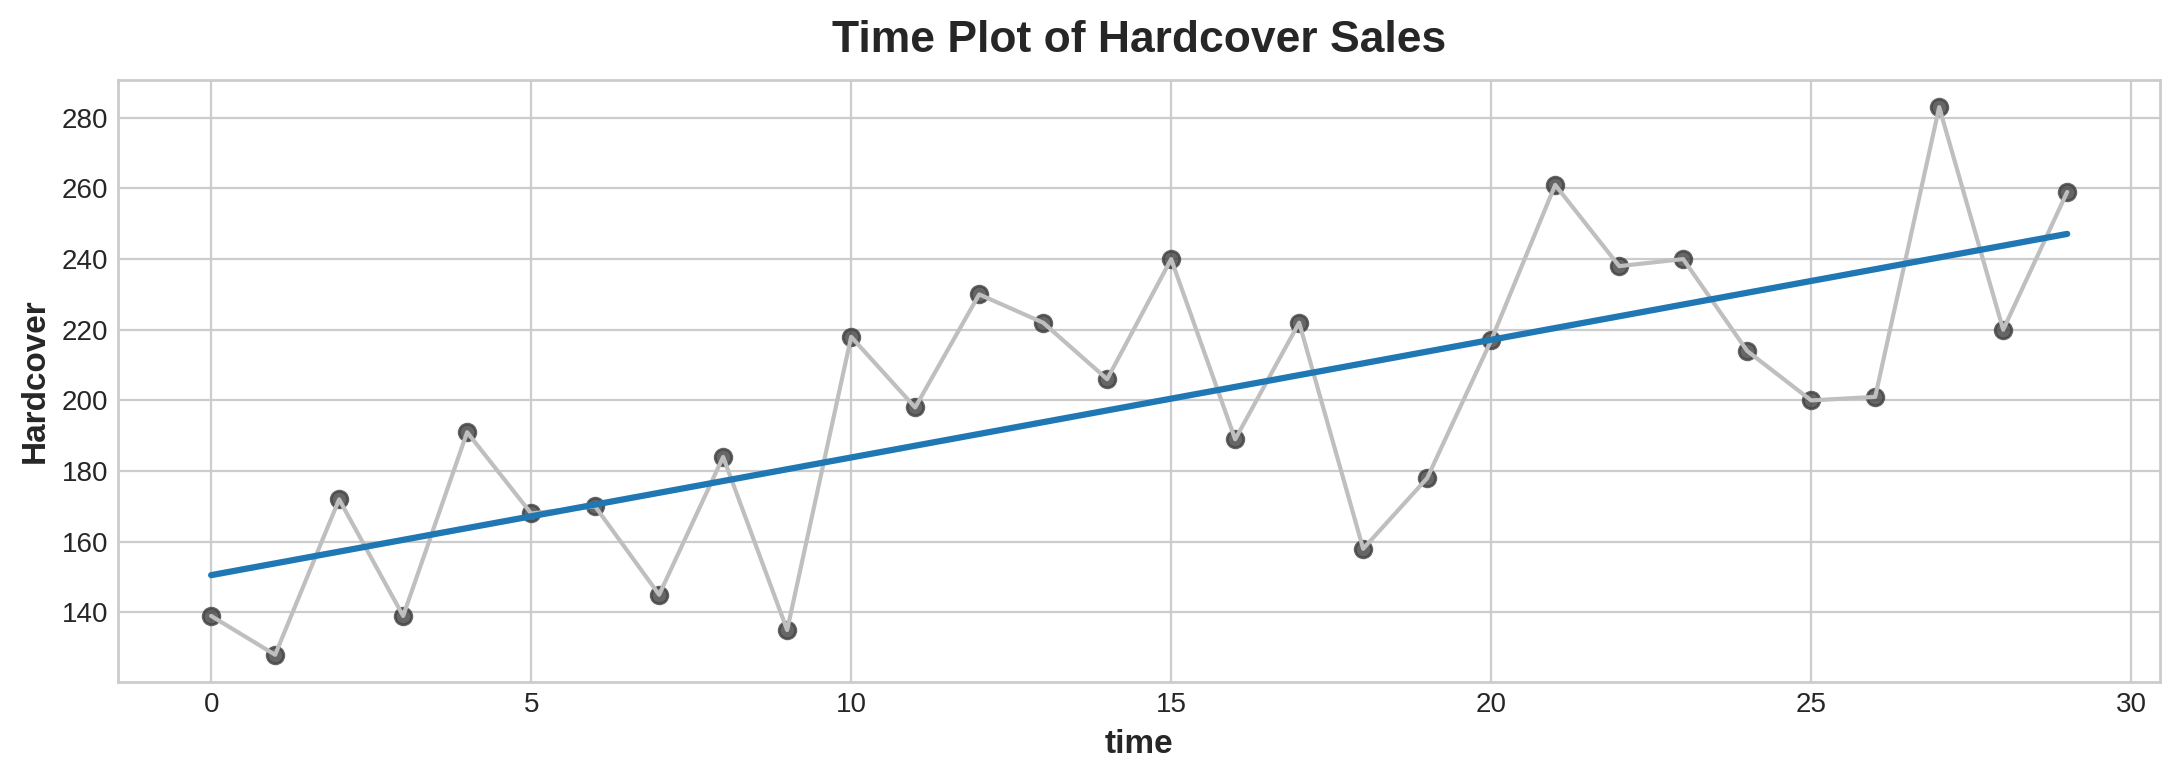

In [11]:
fig, ax = plt.subplots()
ax.plot('time', 'Hardcover', data=data, color='0.75')
ax = sns.regplot(x='time', y='Hardcover', data=data, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Hardcover Sales');

In [12]:
data['lag_1'] = data['Hardcover'].shift(1)
data = data.reindex(columns=['Hardcover', 'lag_1'])
data.head()

Hardcover  lag_1
Date                        
2000-04-01        139    NaN
2000-04-02        128  139.0
2000-04-03        172  128.0
2000-04-04        139  172.0
2000-04-05        191  139.0

In [13]:
data.isnull().sum()

Hardcover    0
lag_1        1
dtype: int64

In [14]:
data.dropna(inplace=True)

Text(0.5, 1.0, 'Lag Plot of Hardcover Sales')

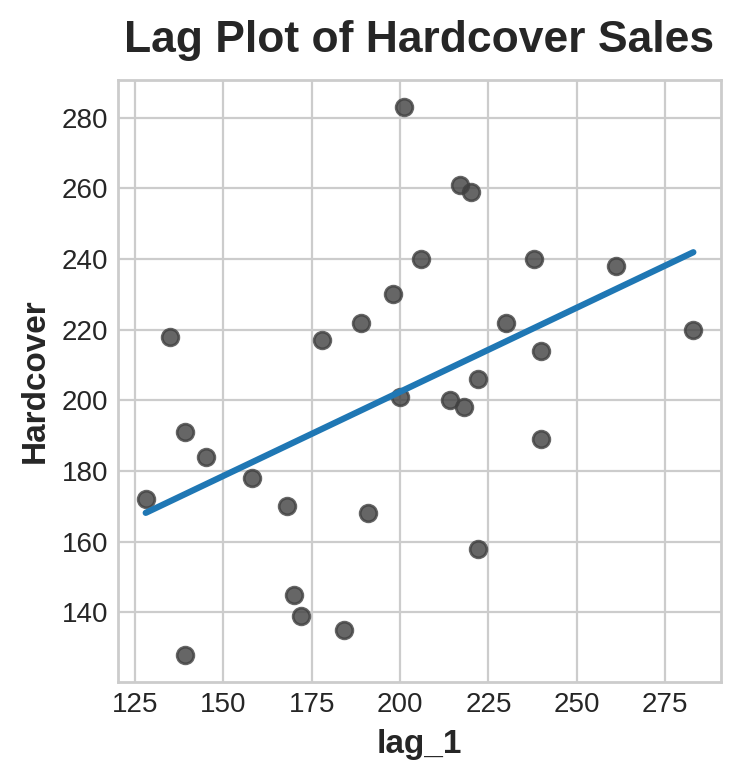

In [15]:
fig, ax = plt.subplots()
ax = sns.regplot(x = 'lag_1', y = 'Hardcover', data = data, ci = None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Hardcover Sales')

In [16]:
tunnel = pd.read_csv('tunnel.csv', parse_dates=['Day'])
tunnel.set_index('Day', inplace=True)
tunnel = tunnel.to_period()

In [17]:
tunnel.head()

NumVehicles
Day                    
2003-11-01       103536
2003-11-02        92051
2003-11-03       100795
2003-11-04       102352
2003-11-05       106569

In [18]:
tunnel['time'] = np.arange(len(tunnel.index))

In [19]:
tunnel.head()

NumVehicles  time
Day                          
2003-11-01       103536     0
2003-11-02        92051     1
2003-11-03       100795     2
2003-11-04       102352     3
2003-11-05       106569     4

In [20]:
x = tunnel.loc[:, ['time']]
y = tunnel.loc[:,'NumVehicles']

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [22]:
y_pred = model.predict(x)
y_pred = pd.Series(data = y_pred, index=x.index)

In [23]:
y_pred

Day
2003-11-01     98176.206344
2003-11-02     98198.703794
2003-11-03     98221.201243
2003-11-04     98243.698693
2003-11-05     98266.196142
                  ...      
2005-11-12    114869.313898
2005-11-13    114891.811347
2005-11-14    114914.308797
2005-11-15    114936.806247
2005-11-16    114959.303696
Freq: D, Length: 747, dtype: float64

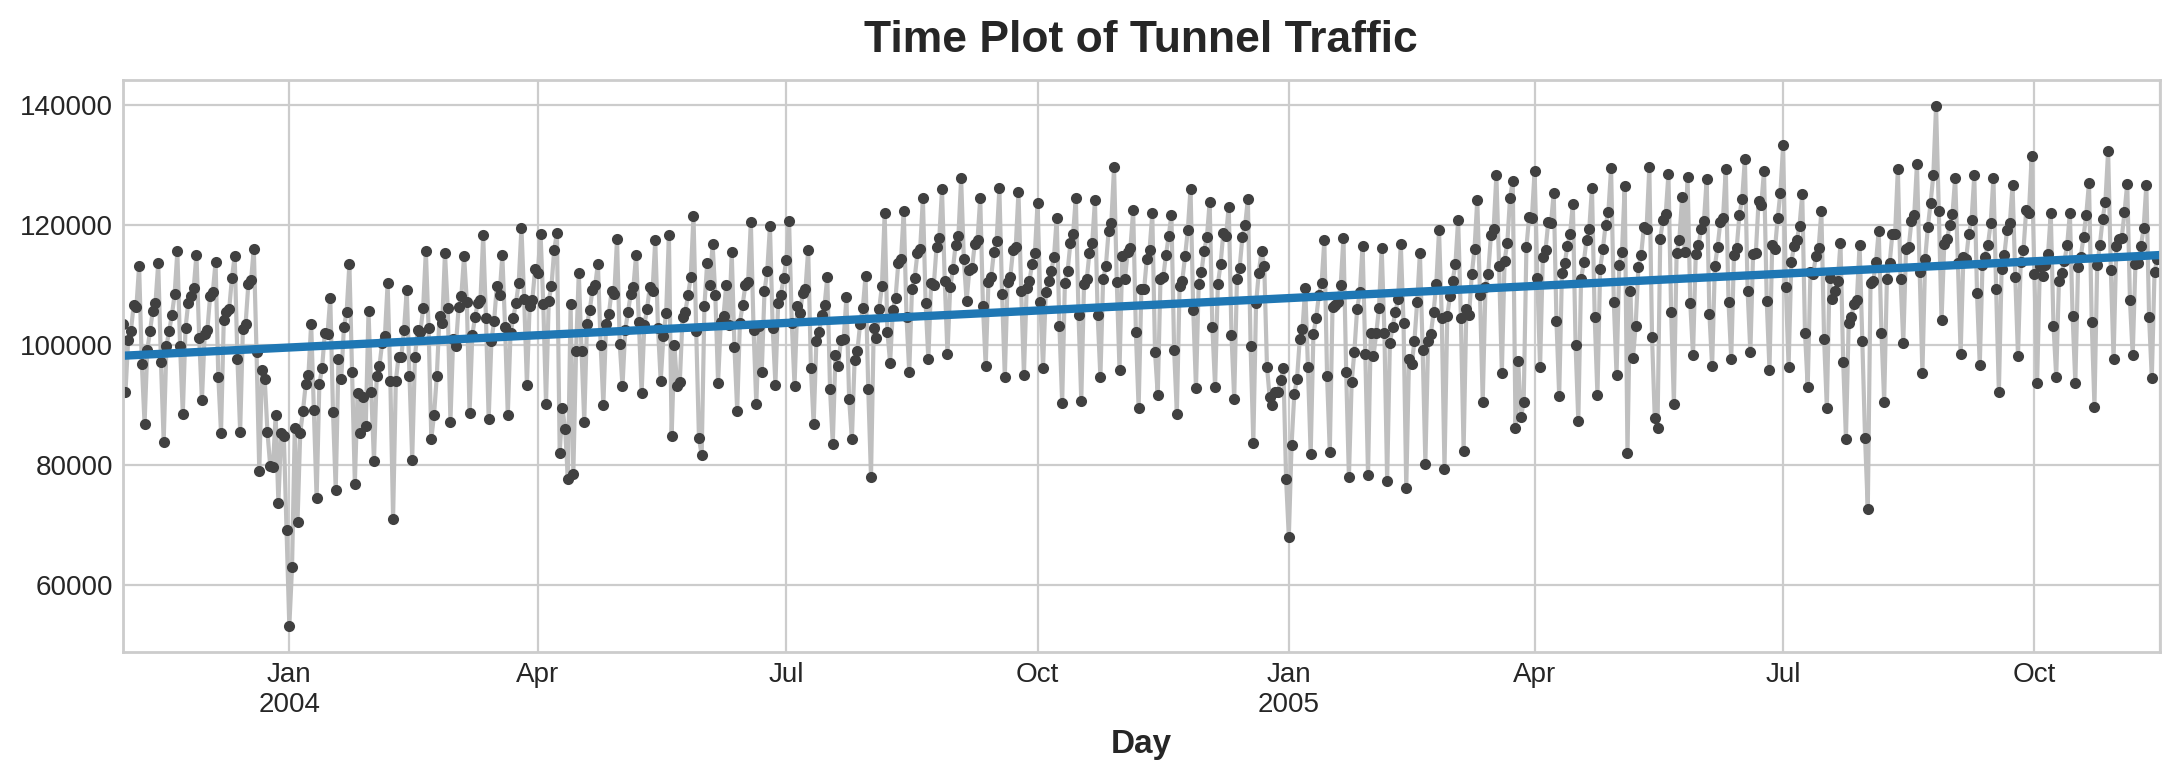

In [24]:
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Tunnel Traffic');

In [25]:
tunnel['lag_1'] = tunnel['NumVehicles'].shift(1)
tunnel.head()

NumVehicles  time     lag_1
Day                                    
2003-11-01       103536     0       NaN
2003-11-02        92051     1  103536.0
2003-11-03       100795     2   92051.0
2003-11-04       102352     3  100795.0
2003-11-05       106569     4  102352.0

In [26]:
x = tunnel.loc[:, ['lag_1']]
x.dropna(inplace=True)
y = tunnel.loc[:, 'NumVehicles']
y, x = y.align(x, join='inner')

In [27]:
model_1 = LinearRegression()
model_1.fit(x, y)

LinearRegression()

In [28]:
y_pred = pd.Series(data = model_1.predict(x), index=x.index)
y_pred

Day
2003-11-02    104961.799284
2003-11-03     98840.684037
2003-11-04    103500.939302
2003-11-05    104330.767464
2003-11-06    106578.285356
                  ...      
2005-11-12    117280.776890
2005-11-13    105553.391615
2005-11-14    100105.412508
2005-11-15    109560.763451
2005-11-16    110696.514134
Freq: D, Length: 746, dtype: float64

Text(0.5, 1.0, 'Lag Plot of Tunnel Traffic')

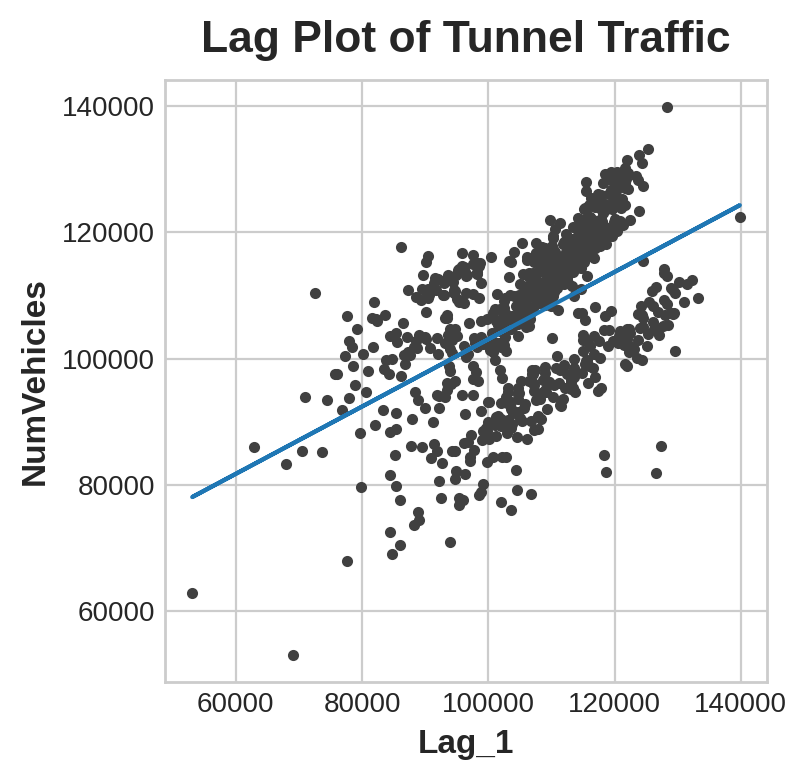

In [29]:
fig, ax = plt.subplots()
ax.plot(x['lag_1'], y, '.', color = '0.25')
ax.plot(x['lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_xlabel('Lag_1')
ax.set_ylabel('NumVehicles')
ax.set_title('Lag Plot of Tunnel Traffic')

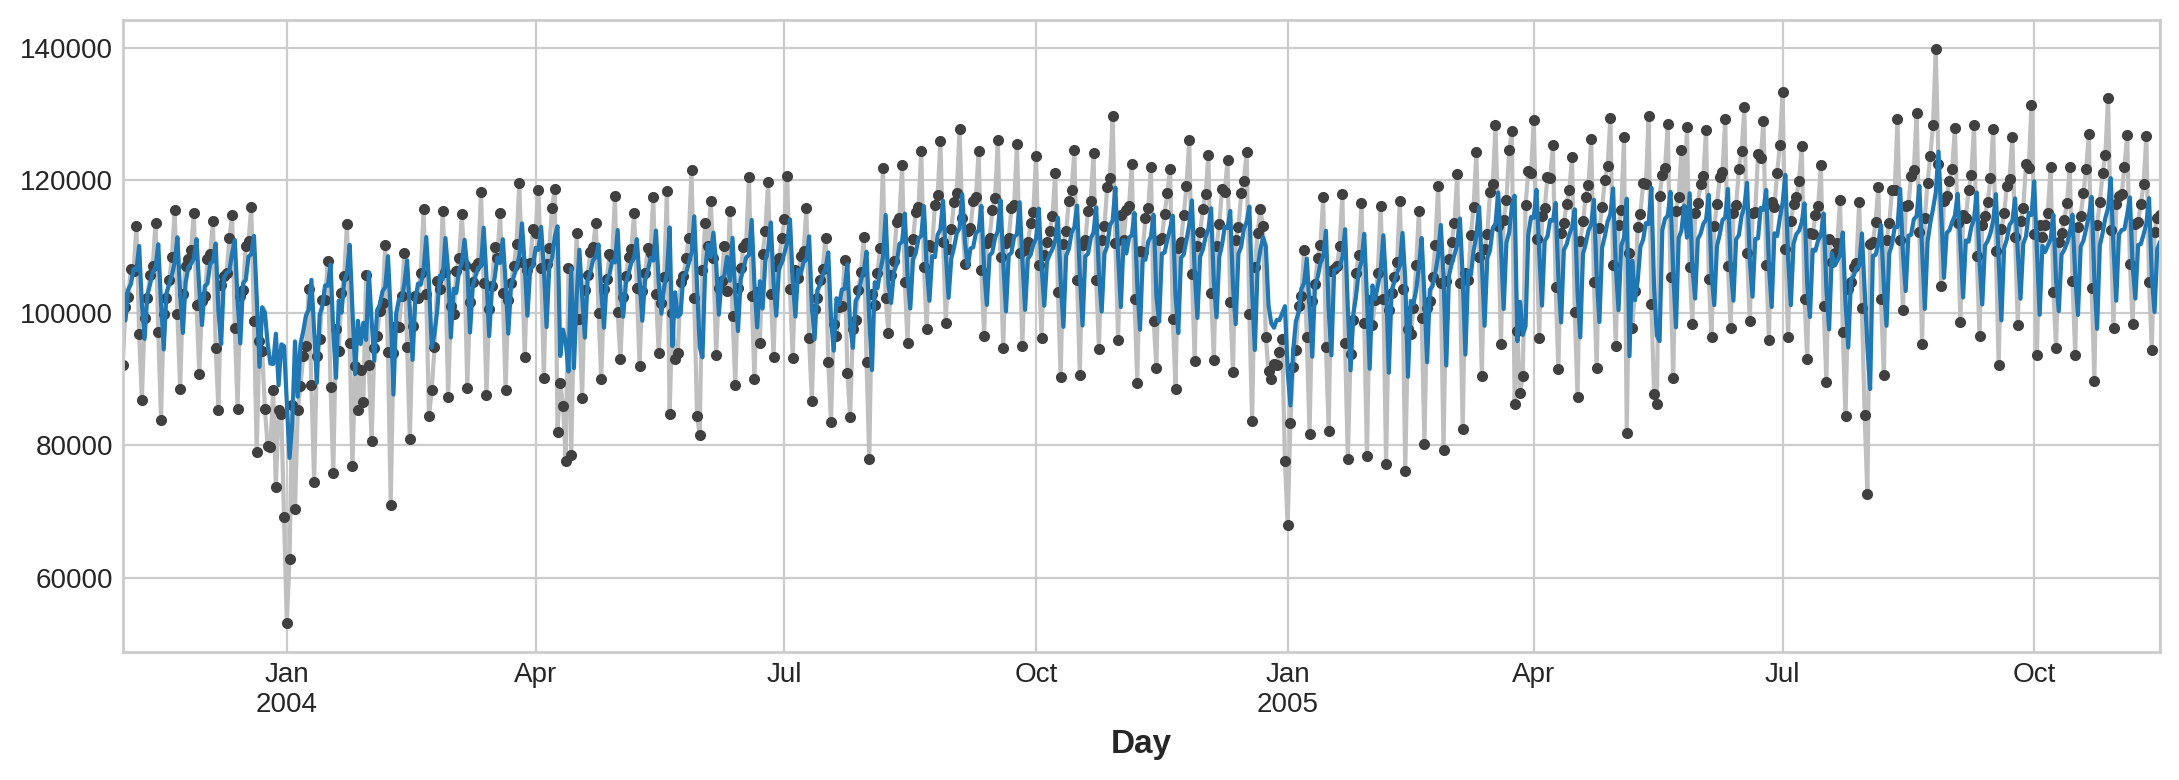

In [30]:
ax = y.plot(**plot_params)
ax = y_pred.plot()

### Trend

In [31]:
tunnel = pd.read_csv('tunnel.csv', parse_dates=['Day'])
tunnel.set_index('Day', inplace=True)
tunnel = tunnel.to_period()
tunnel.head()

NumVehicles
Day                    
2003-11-01       103536
2003-11-02        92051
2003-11-03       100795
2003-11-04       102352
2003-11-05       106569

In [32]:
moving_average = tunnel.rolling(
    window = 365,
    center=True,
    min_periods = 183,
).mean()

<AxesSubplot:title={'center':'Tunnel Traffic - 365-Day Moving Average'}, xlabel='Day'>

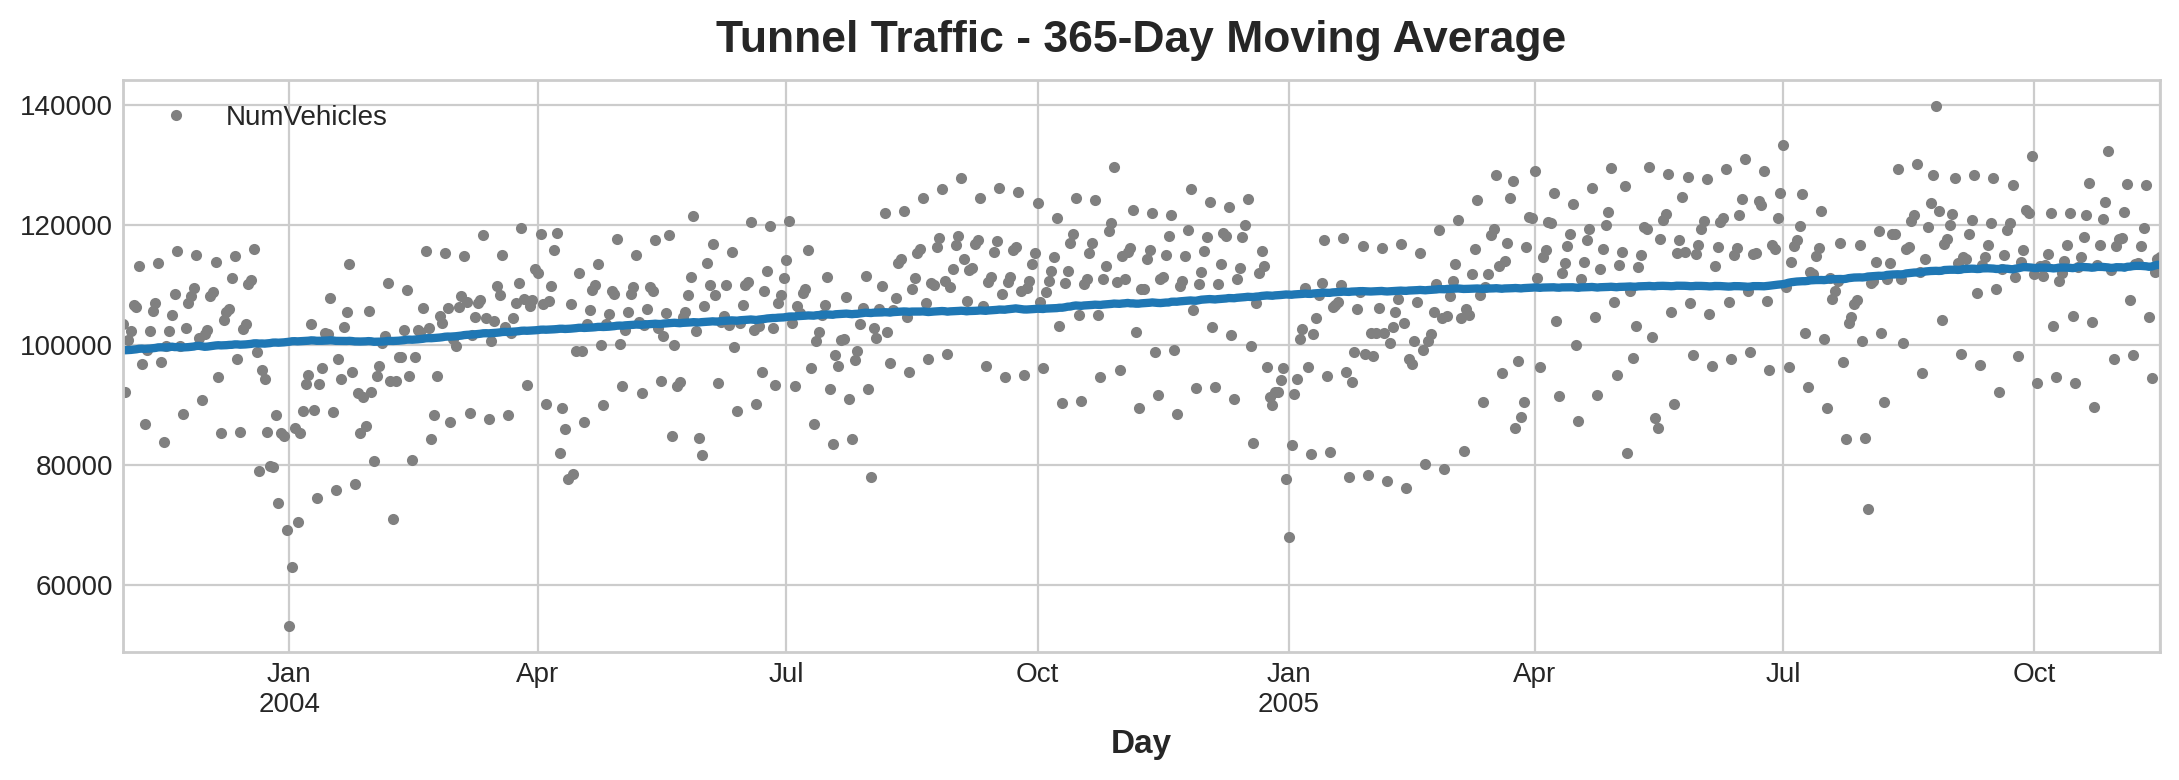

In [33]:
ax = tunnel.plot(style='.', color = '0.5')
moving_average.plot(ax = ax, linewidth = 3, title="Tunnel Traffic - 365-Day Moving Average", legend=False)

In [34]:
from statsmodels.tsa.deterministic import DeterministicProcess
dp = DeterministicProcess(
    index=tunnel.index,    # dates from training data
    constant=True,         # dummy feature from the bias
    order=1,               # the time dummy (trend) linear
    drop=True,
)
x =dp.in_sample() # creates the features for the data
x

const  trend
Day                     
2003-11-01    1.0    1.0
2003-11-02    1.0    2.0
2003-11-03    1.0    3.0
2003-11-04    1.0    4.0
2003-11-05    1.0    5.0
...           ...    ...
2005-11-12    1.0  743.0
2005-11-13    1.0  744.0
2005-11-14    1.0  745.0
2005-11-15    1.0  746.0
2005-11-16    1.0  747.0

[747 rows x 2 columns]

In [35]:
y = tunnel['NumVehicles']

model_2 = LinearRegression(fit_intercept=False)
model_2.fit(x, y)

LinearRegression(fit_intercept=False)

<AxesSubplot:xlabel='Day'>

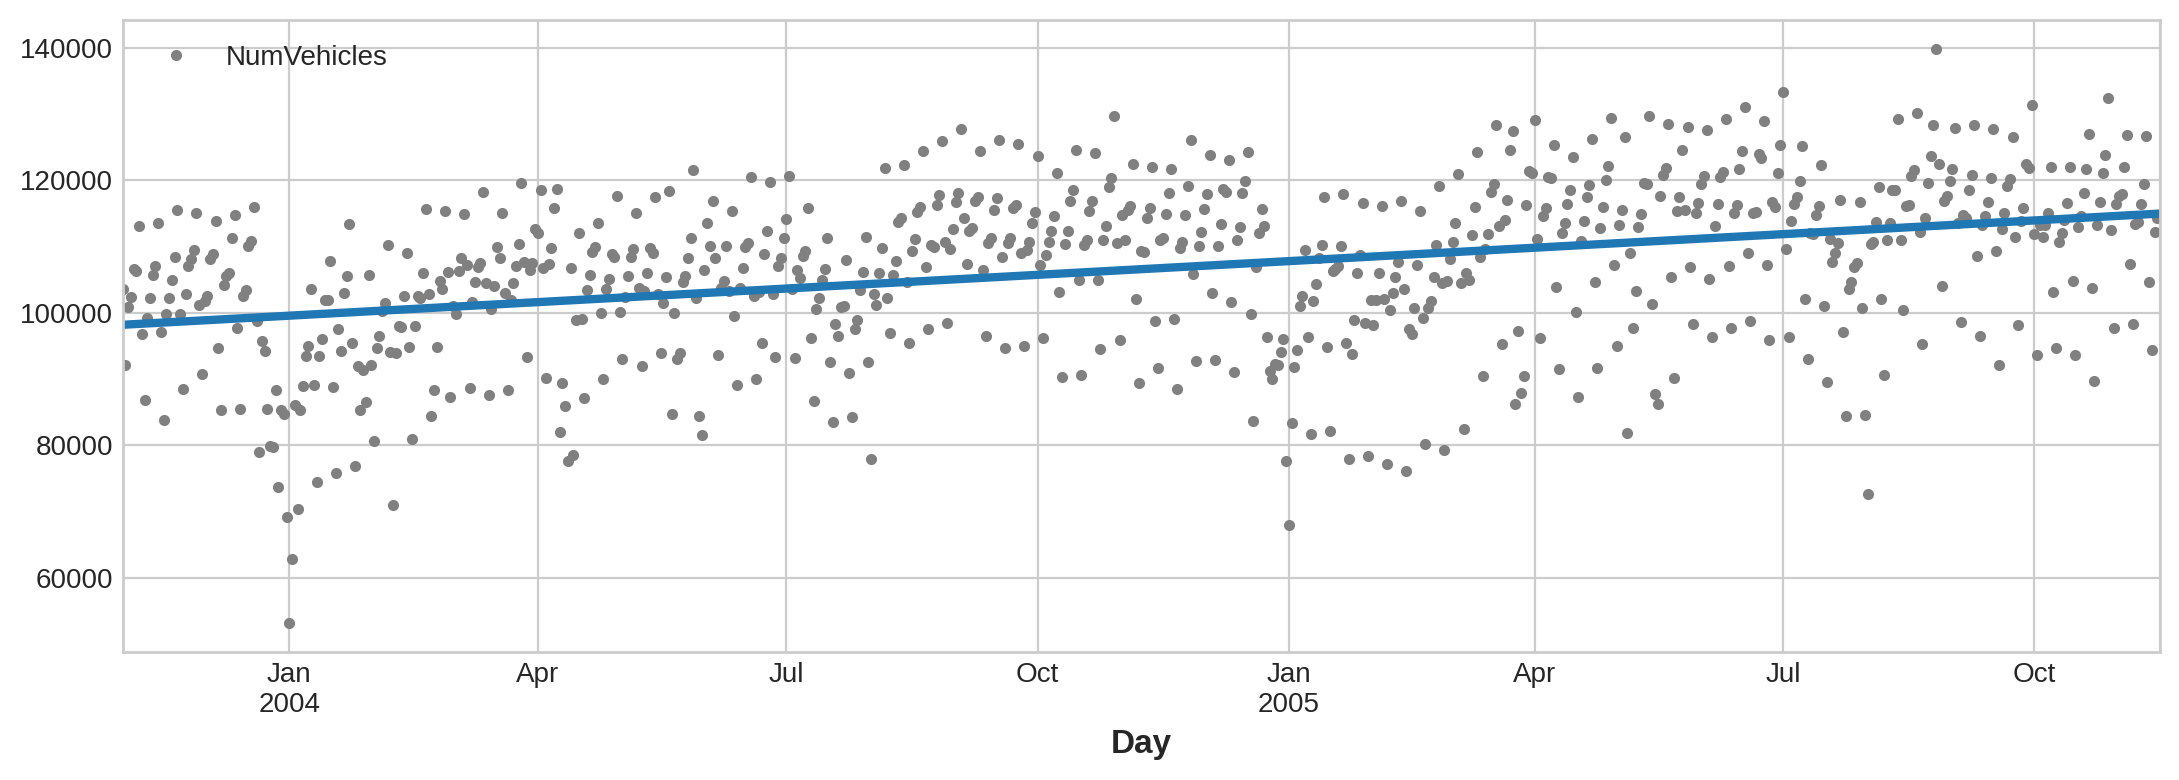

In [36]:
y_pred = pd.Series(data = model_2.predict(x), index=x.index)
ax = tunnel.plot(style='.', color = '0.5')
y_pred.plot(ax = ax, linewidth = 3, label = 'Trend')

In [37]:
x = dp.out_of_sample(steps=60)   # make a 30 days forecast
y_fore = pd.Series(model_2.predict(x), index=x.index)
y_fore

2005-11-17    114981.801146
2005-11-18    115004.298595
2005-11-19    115026.796045
2005-11-20    115049.293494
2005-11-21    115071.790944
2005-11-22    115094.288393
2005-11-23    115116.785843
2005-11-24    115139.283292
2005-11-25    115161.780742
2005-11-26    115184.278191
2005-11-27    115206.775641
2005-11-28    115229.273090
2005-11-29    115251.770540
2005-11-30    115274.267990
2005-12-01    115296.765439
2005-12-02    115319.262889
2005-12-03    115341.760338
2005-12-04    115364.257788
2005-12-05    115386.755237
2005-12-06    115409.252687
2005-12-07    115431.750136
2005-12-08    115454.247586
2005-12-09    115476.745035
2005-12-10    115499.242485
2005-12-11    115521.739934
2005-12-12    115544.237384
2005-12-13    115566.734833
2005-12-14    115589.232283
2005-12-15    115611.729733
2005-12-16    115634.227182
2005-12-17    115656.724632
2005-12-18    115679.222081
2005-12-19    115701.719531
2005-12-20    115724.216980
2005-12-21    115746.714430
2005-12-22    115769

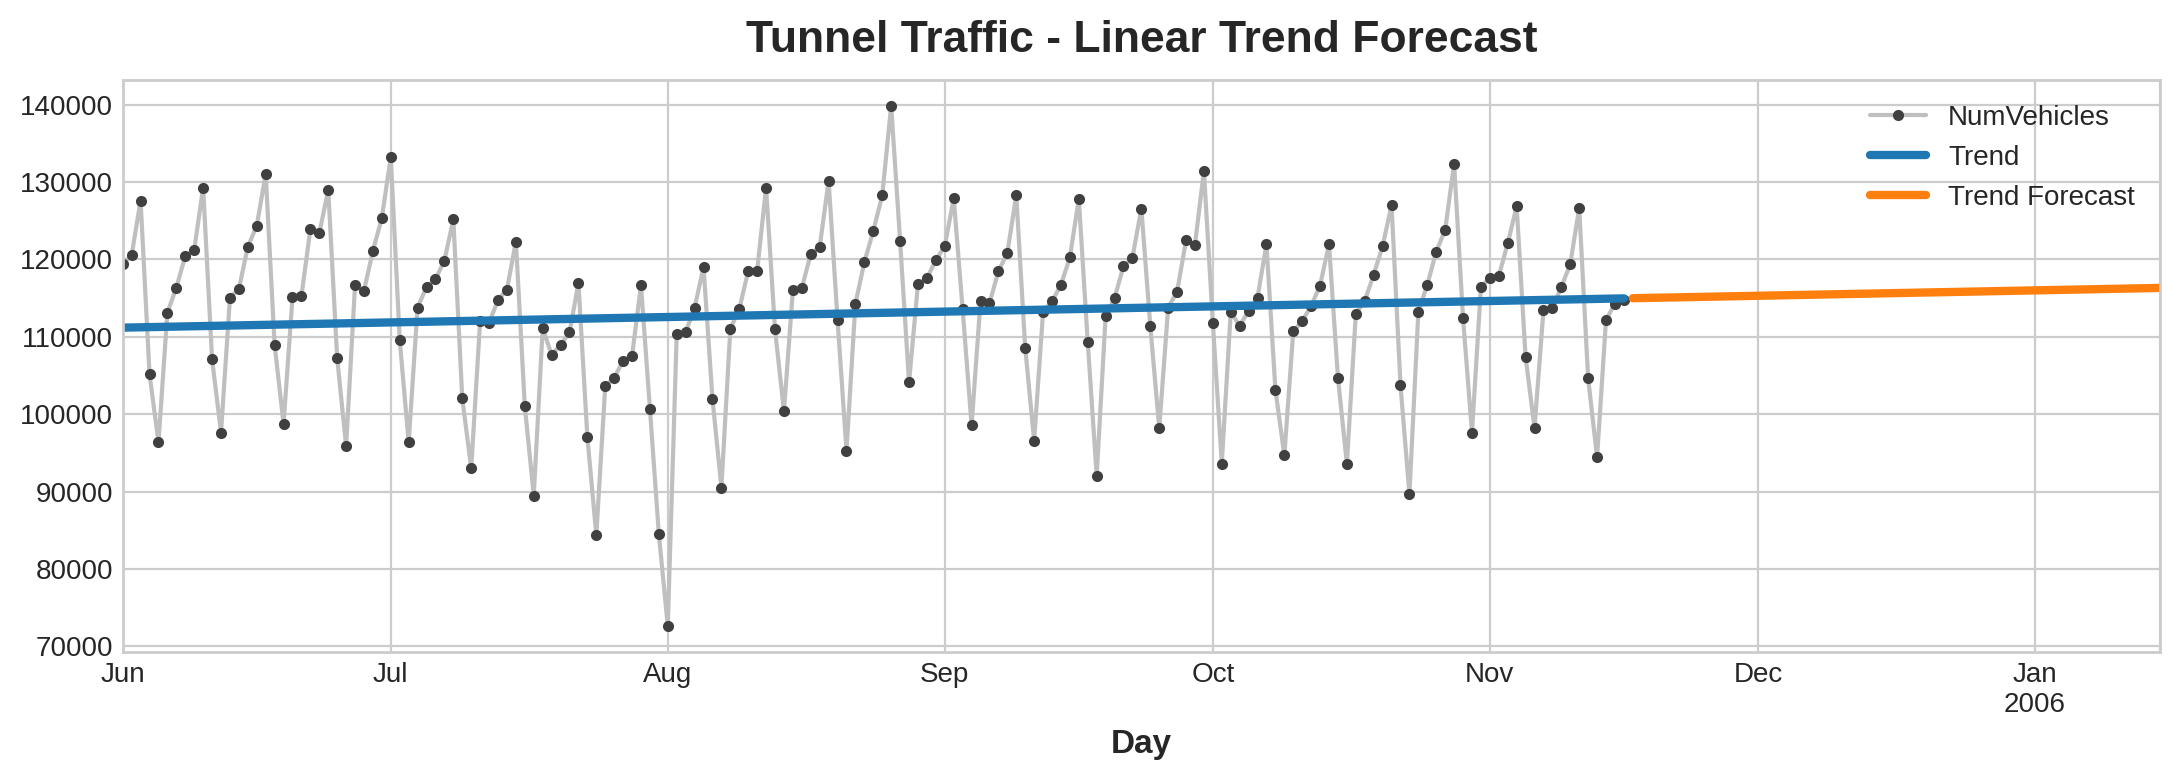

In [38]:
ax = tunnel["2005-06":].plot(title='Tunnel Traffic - Linear Trend Forecast', **plot_params)
ax = y_pred["2005-06":].plot(ax = ax, linewidth = 3, label = 'Trend')
ax = y_fore.plot(ax = ax, linewidth = 3, label = 'Trend Forecast')
ax.legend()

### Seasonality

In [39]:
from statsmodels.tsa.deterministic import CalendarFourier

In [40]:
def seasonal_plot(X, y, period, freq, ax = None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette('husl', n_colors = X[period].nunique(),)
    ax = sns.lineplot(
        x = freq,
        y = y,
        hue = period,
        data = X,
        ci = False,
        ax = ax,
        palette = palette,
        legend = False,
    )
    ax.set_title(f'Seasonal Plot ({period} / {freq})')
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy = (1, y_),
            xytext = (6, 0),
            color = line.get_color(),
            xycoords = ax.get_yaxis_transform(),
            textcoords = 'offset points',
            size = 14,
            va = 'center',
        )
    return ax

def plot_periodogram(ts, detrend = 'linear', ax = None):
    from scipy.signal import periodogram
    fs = pd.Timedelta('365D') / pd.Timedelta('1D')
    frequencies, spectrum = periodogram(
        ts,
        fs = fs,
        detrend = detrend,
        window = 'boxcar',
        scaling = 'spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(frequencies, spectrum, color = 'purple')
    ax.set_xscale('log')
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            'Annual(1)',
            'Semiannual(2)',
            'Quarterly(4)',
            'Biomonthly(6)',
            'Monthly(12)',
            'Biweekly(26)',
            'Weekly(52)',
            'Semiweekly(104)'
        ],
        rotation = 30,
    )
    ax.ticklabel_format(axis = 'y', style = 'sci', scilimits = (0, 0))
    ax.set_ylabel('Variance')
    ax.set_title('Periodogram')

    return ax

In [41]:
tunnel = pd.read_csv('tunnel.csv', parse_dates = ['Day'])
tunnel.set_index('Day', inplace=True)
tunnel = tunnel.to_period('D')
tunnel.head()

NumVehicles
Day                    
2003-11-01       103536
2003-11-02        92051
2003-11-03       100795
2003-11-04       102352
2003-11-05       106569

In [42]:
tunnel['day'] = tunnel.index.day_of_week
tunnel['week'] = tunnel.index.week
tunnel['day_of_year'] = tunnel.index.day_of_year
tunnel['year'] = tunnel.index.year
tunnel.head()

NumVehicles  day  week  day_of_year  year
Day                                                  
2003-11-01       103536    5    44          305  2003
2003-11-02        92051    6    44          306  2003
2003-11-03       100795    0    45          307  2003
2003-11-04       102352    1    45          308  2003
2003-11-05       106569    2    45          309  2003

<AxesSubplot:title={'center':'Seasonal Plot (year / day_of_year)'}, xlabel='day_of_year', ylabel='NumVehicles'>

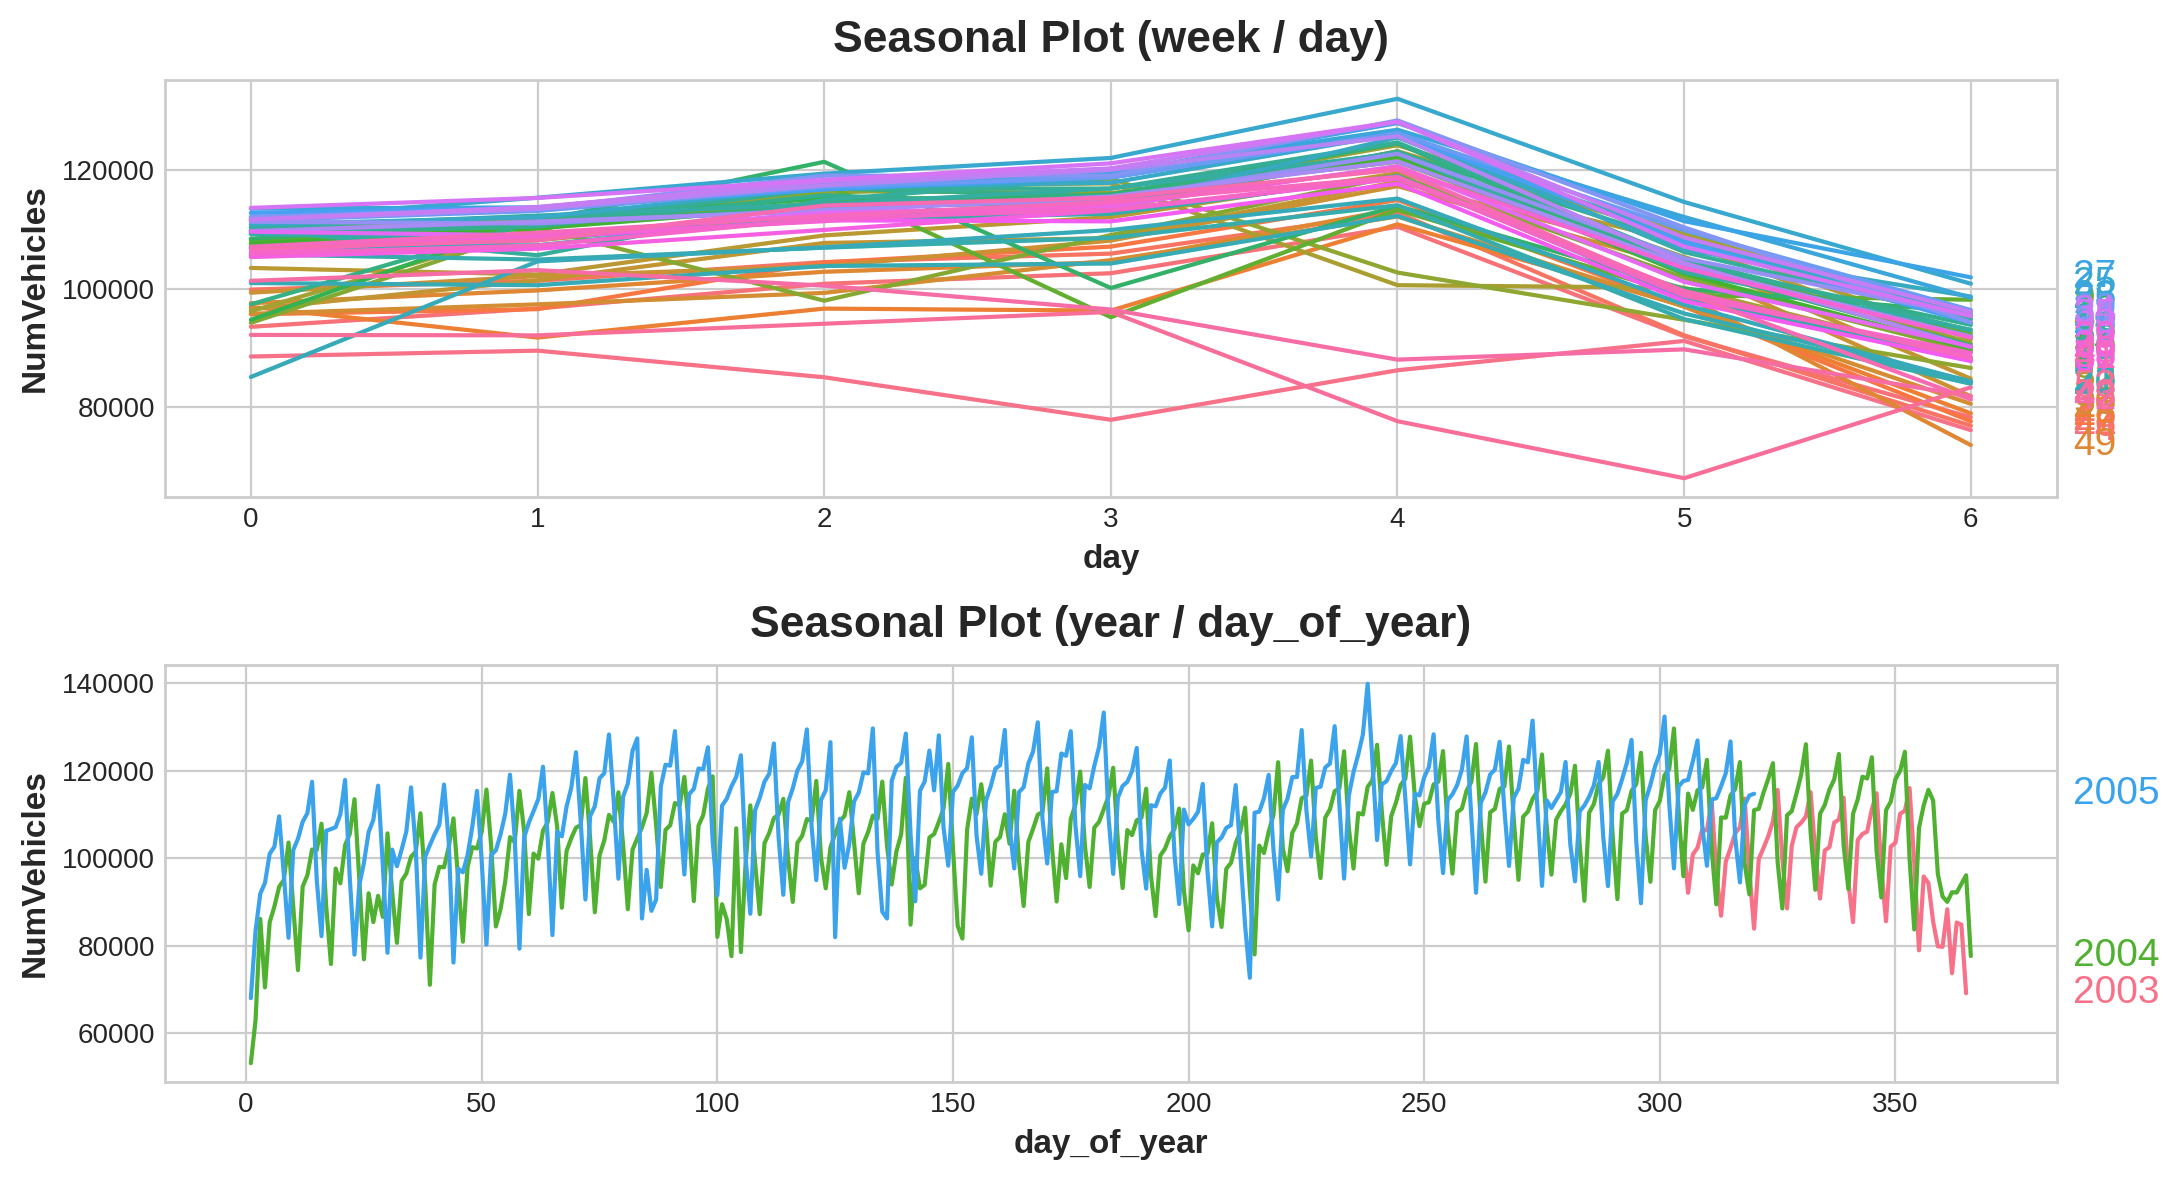

In [43]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(11, 6))
seasonal_plot(tunnel, y="NumVehicles", period="week", freq="day", ax=ax0)
seasonal_plot(tunnel, y="NumVehicles", period="year", freq="day_of_year", ax=ax1)

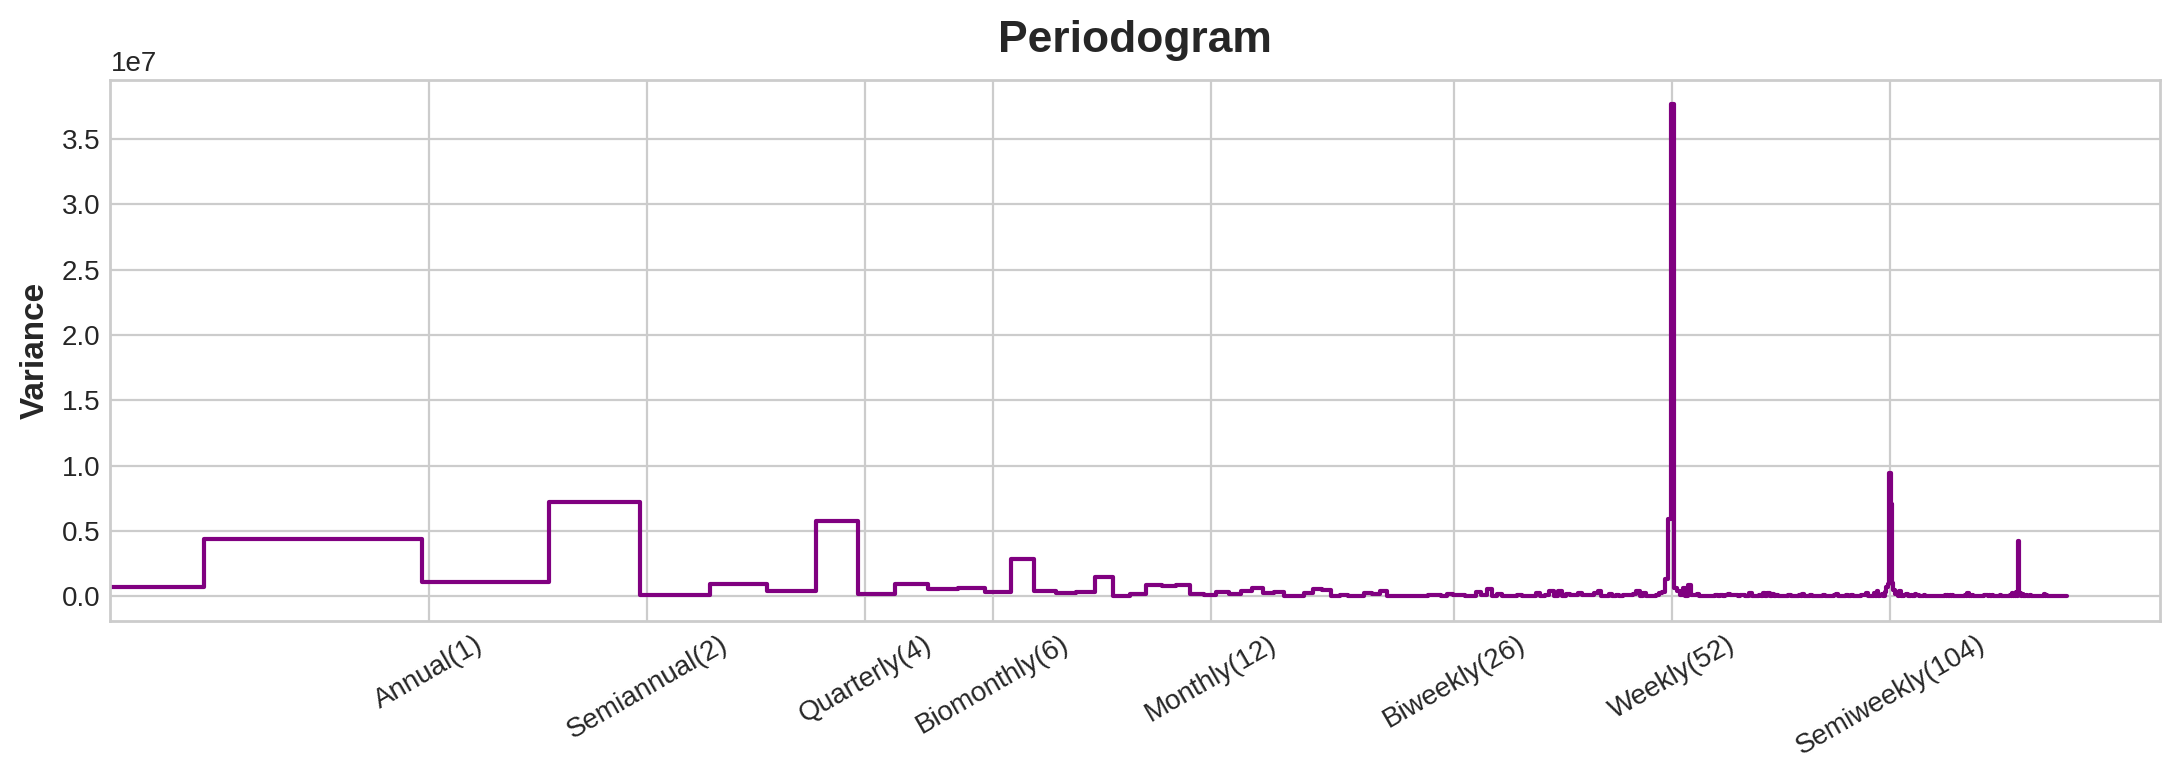

In [44]:
plot_periodogram(tunnel['NumVehicles']);

In [45]:
fourier = CalendarFourier(freq = 'A', order = 10)
dp = DeterministicProcess(
    index = tunnel.index,
    constant = True, 
    order = 1,
    seasonal = True,
    additional_terms = [fourier],
    drop = True,
)
x = dp.in_sample()
x.head()

const  trend  s(2,7)  s(3,7)  s(4,7)  s(5,7)  s(6,7)  s(7,7)  \
Day                                                                        
2003-11-01    1.0    1.0     0.0     0.0     0.0     0.0     0.0     0.0   
2003-11-02    1.0    2.0     1.0     0.0     0.0     0.0     0.0     0.0   
2003-11-03    1.0    3.0     0.0     1.0     0.0     0.0     0.0     0.0   
2003-11-04    1.0    4.0     0.0     0.0     1.0     0.0     0.0     0.0   
2003-11-05    1.0    5.0     0.0     0.0     0.0     1.0     0.0     0.0   

            sin(1,freq=A-DEC)  cos(1,freq=A-DEC)  ...  sin(6,freq=A-DEC)  \
Day                                               ...                      
2003-11-01          -0.867456           0.497513  ...          -0.017213   
2003-11-02          -0.858764           0.512371  ...           0.085965   
2003-11-03          -0.849817           0.527078  ...           0.188227   
2003-11-04          -0.840618           0.541628  ...           0.288482   
2003-11-05          -0.831171           0.556017  ...           0.385663   

            cos(6,freq=A-DEC)  sin(7,freq=A-DEC)  cos(7,freq=A-DEC)  \
Day                                                                   
2003-11-01           0.999852          -0.875892           0.482508   
2003-11-02           0.996298          -0.811539           0.584298   
2003-11-03           0.982126          -0.735417           0.677615   
2003-11-04           0.957485          -0.648630           0.761104   
2003-11-05           0.922640          -0.552435           0.833556   

            sin(8,freq=A-DEC)  cos(8,freq=A-DEC)  sin(9,freq=A-DEC)  \
Day                                                                   
2003-11-01          -0.854322          -0.519744           0.025818   
2003-11-02          -0.917584          -0.397543          -0.128748   
2003-11-03          -0.963471          -0.267814          -0.280231   
2003-11-04          -0.991114          -0.133015          -0.425000   
2003-11-05          -0.999991           0.004304          -0.559589   

            cos(9,freq=A-DEC)  sin(10,freq=A-DEC)  cos(10,freq=A-DEC)  
Day                                                                    
2003-11-01          -0.999667            0.880012           -0.474951  
2003-11-02          -0.991677            0.785650           -0.618671  
2003-11-03          -0.959933            0.668064           -0.744104  
2003-11-04          -0.905193            0.530730           -0.847541  
2003-11-05          -0.828770            0.377708           -0.925925  

[5 rows x 28 columns]

In [46]:
y = tunnel['NumVehicles']
model_3 = LinearRegression(fit_intercept = False)
model_3.fit(x, y)

LinearRegression(fit_intercept=False)

In [47]:
y_pred = pd.Series(data = model_3.predict(x), index = x.index)
y_fore = dp.out_of_sample(steps = 90)
y_fore = pd.Series(data = model_3.predict(y_fore), index = y_fore.index) 

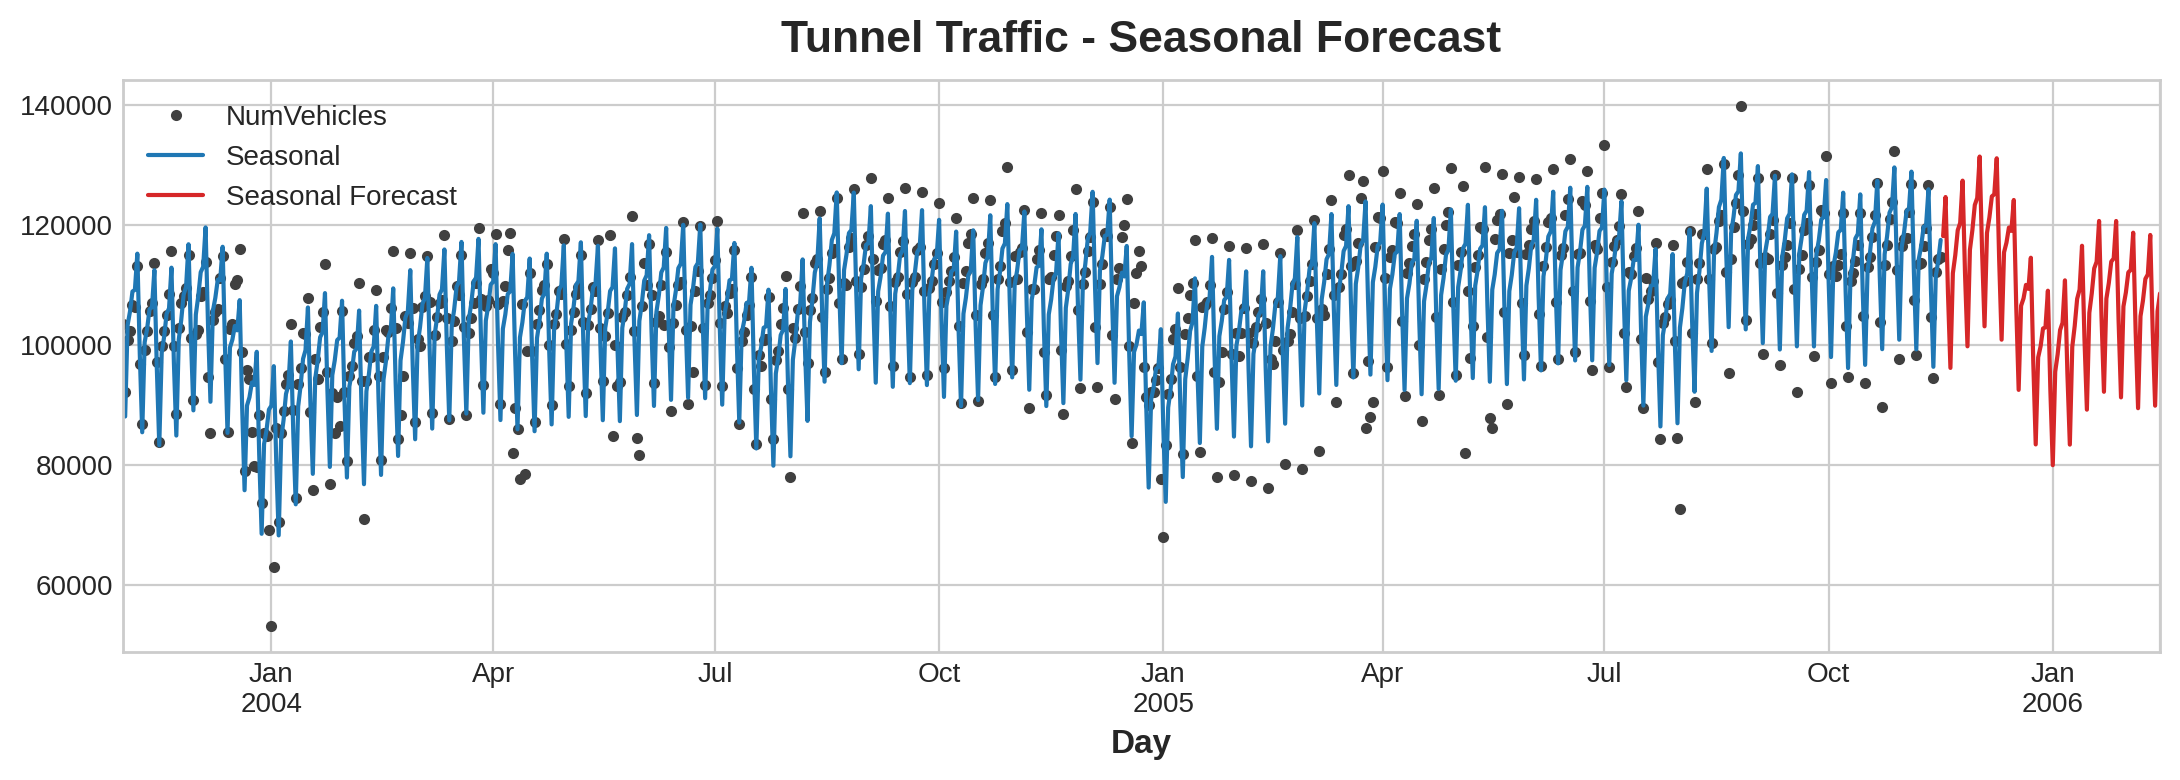

In [48]:
ax = y.plot(color = '0.25', style = '.', title = "Tunnel Traffic - Seasonal Forecast")
ax = y_pred.plot(ax = ax, label = "Seasonal")
ax = y_fore.plot(ax = ax, label = "Seasonal Forecast", color = 'C3')
_ = ax.legend()

### Time Series As Features

In [49]:
reserve = pd.read_csv('reserve.csv', parse_dates = {'Date': ['Year', 'Month', 'Day']}, index_col = 'Date')
reserve.head()

Federal Funds Target Rate  Federal Funds Upper Target  \
Date                                                                
1954-07-01                        NaN                         NaN   
1954-08-01                        NaN                         NaN   
1954-09-01                        NaN                         NaN   
1954-10-01                        NaN                         NaN   
1954-11-01                        NaN                         NaN   

            Federal Funds Lower Target  Effective Federal Funds Rate  \
Date                                                                   
1954-07-01                         NaN                          0.80   
1954-08-01                         NaN                          1.22   
1954-09-01                         NaN                          1.06   
1954-10-01                         NaN                          0.85   
1954-11-01                         NaN                          0.83   

            Real GDP (Percent Change)  Unemployment Rate  Inflation Rate  
Date                                                                      
1954-07-01                        4.6                5.8             NaN  
1954-08-01                        NaN                6.0             NaN  
1954-09-01                        NaN                6.1             NaN  
1954-10-01                        8.0                5.7             NaN  
1954-11-01                        NaN                5.3             NaN

In [50]:
y = reserve.loc[:, 'Unemployment Rate'].dropna().to_period('M')
df = pd.DataFrame(
    {'Unemployment Rate': y, 'lag_1': y.shift(1), 'lag_2': y.shift(2)}
)
df.head()

Unemployment Rate  lag_1  lag_2
Date                                    
1954-07                5.8    NaN    NaN
1954-08                6.0    5.8    NaN
1954-09                6.1    6.0    5.8
1954-10                5.7    6.1    6.0
1954-11                5.3    5.7    6.1

In [51]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.offsetbox import AnchoredText


In [52]:
def lagplot(x, y=None, lag=1, standardize=False, ax=None, **kwargs):
    x_ = x.shift(lag)
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75,
        s=3,
    )
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_,
                     y=y_,
                     scatter_kws=scatter_kws,
                     line_kws=line_kws,
                     lowess=True,
                     ax=ax,
                     **kwargs)
    at = AnchoredText(
        f"{corr:.2f}",
        prop=dict(size="large"),
        frameon=True,
        loc="upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    ax.set(title=f"Lag {lag}", xlabel=x_.name, ylabel=y_.name)
    return ax


def plot_lags(x, y=None, lags=6, nrows=1, lagplot_kwargs={}, **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    kwargs.setdefault('ncols', math.ceil(lags / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        if k + 1 <= lags:
            ax = lagplot(x, y, lag=k + 1, ax=ax, **lagplot_kwargs)
            ax.set_title(f"Lag {k + 1}", fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel=x.name)
    plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    return fig

In [53]:
flu_trends = pd.read_csv('flu-trends.csv')
flu_trends.set_index(pd.PeriodIndex(flu_trends.Week, freq = 'W'), inplace = True)
flu_trends.head()

Week  AInfluenza  AcuteBronchitis  \
Week                                                                        
2009-06-29/2009-07-05  2009-06-29/2009-07-05          36               20   
2009-07-06/2009-07-12  2009-07-06/2009-07-12          25               19   
2009-07-13/2009-07-19  2009-07-13/2009-07-19          24               30   
2009-07-20/2009-07-26  2009-07-20/2009-07-26          23               19   
2009-07-27/2009-08-02  2009-07-27/2009-08-02          27               21   

                       BodyTemperature  BraunThermoscan  BreakAFever  \
Week                                                                   
2009-06-29/2009-07-05               43               27           11   
2009-07-06/2009-07-12               40               31           10   
2009-07-13/2009-07-19               45               20           12   
2009-07-20/2009-07-26               40               15           10   
2009-07-27/2009-08-02               44               20           11   

                       Bronchitis  ChestCold  ColdAndFlu  ColdOrFlu  ...  \
Week                                                                 ...   
2009-06-29/2009-07-05          22         16           7          3  ...   
2009-07-06/2009-07-12          21         11           6          8  ...   
2009-07-13/2009-07-19          20         20           6          6  ...   
2009-07-20/2009-07-26          19         12           7         10  ...   
2009-07-27/2009-08-02          19         17           8         10  ...   

                       TreatingTheFlu  TreatmentForFlu  TreatmentForTheFlu  \
Week                                                                         
2009-06-29/2009-07-05              16                6                  13   
2009-07-06/2009-07-12              16                7                   8   
2009-07-13/2009-07-19              16                6                   9   
2009-07-20/2009-07-26               8                5                  12   
2009-07-27/2009-08-02               8                8                  12   

                       Tussin  Tussionex  TypeAInfluenza  UpperRespiratory  \
Week                                                                         
2009-06-29/2009-07-05      25         34              30                25   
2009-07-06/2009-07-12      27         32              27                28   
2009-07-13/2009-07-19      24         28              25                25   
2009-07-20/2009-07-26      21         26              26                29   
2009-07-27/2009-08-02      33         29              21                27   

                       WalkingPneumonia  WhatToDoIfYouHaveTheFlu  FluVisits  
Week                                                                         
2009-06-29/2009-07-05                24                       15        180  
2009-07-06/2009-07-12                29                        9        115  
2009-07-13/2009-07-19                25                        9        132  
2009-07-20/2009-07-26                24                       13        109  
2009-07-27/2009-08-02                30                        9        120  

[5 rows x 131 columns]

In [54]:
df = flu_trends.drop('Week', axis = 1)
df.head()

AInfluenza  AcuteBronchitis  BodyTemperature  \
Week                                                                  
2009-06-29/2009-07-05          36               20               43   
2009-07-06/2009-07-12          25               19               40   
2009-07-13/2009-07-19          24               30               45   
2009-07-20/2009-07-26          23               19               40   
2009-07-27/2009-08-02          27               21               44   

                       BraunThermoscan  BreakAFever  Bronchitis  ChestCold  \
Week                                                                         
2009-06-29/2009-07-05               27           11          22         16   
2009-07-06/2009-07-12               31           10          21         11   
2009-07-13/2009-07-19               20           12          20         20   
2009-07-20/2009-07-26               15           10          19         12   
2009-07-27/2009-08-02               20           11          19         17   

                       ColdAndFlu  ColdOrFlu  ColdVersusFlu  ...  \
Week                                                         ...   
2009-06-29/2009-07-05           7          3              8  ...   
2009-07-06/2009-07-12           6          8              8  ...   
2009-07-13/2009-07-19           6          6              8  ...   
2009-07-20/2009-07-26           7         10             15  ...   
2009-07-27/2009-08-02           8         10             15  ...   

                       TreatingTheFlu  TreatmentForFlu  TreatmentForTheFlu  \
Week                                                                         
2009-06-29/2009-07-05              16                6                  13   
2009-07-06/2009-07-12              16                7                   8   
2009-07-13/2009-07-19              16                6                   9   
2009-07-20/2009-07-26               8                5                  12   
2009-07-27/2009-08-02               8                8                  12   

                       Tussin  Tussionex  TypeAInfluenza  UpperRespiratory  \
Week                                                                         
2009-06-29/2009-07-05      25         34              30                25   
2009-07-06/2009-07-12      27         32              27                28   
2009-07-13/2009-07-19      24         28              25                25   
2009-07-20/2009-07-26      21         26              26                29   
2009-07-27/2009-08-02      33         29              21                27   

                       WalkingPneumonia  WhatToDoIfYouHaveTheFlu  FluVisits  
Week                                                                         
2009-06-29/2009-07-05                24                       15        180  
2009-07-06/2009-07-12                29                        9        115  
2009-07-13/2009-07-19                25                        9        132  
2009-07-20/2009-07-26                24                       13        109  
2009-07-27/2009-08-02                30                        9        120  

[5 rows x 130 columns]

Text(0, 0.5, 'office visits')

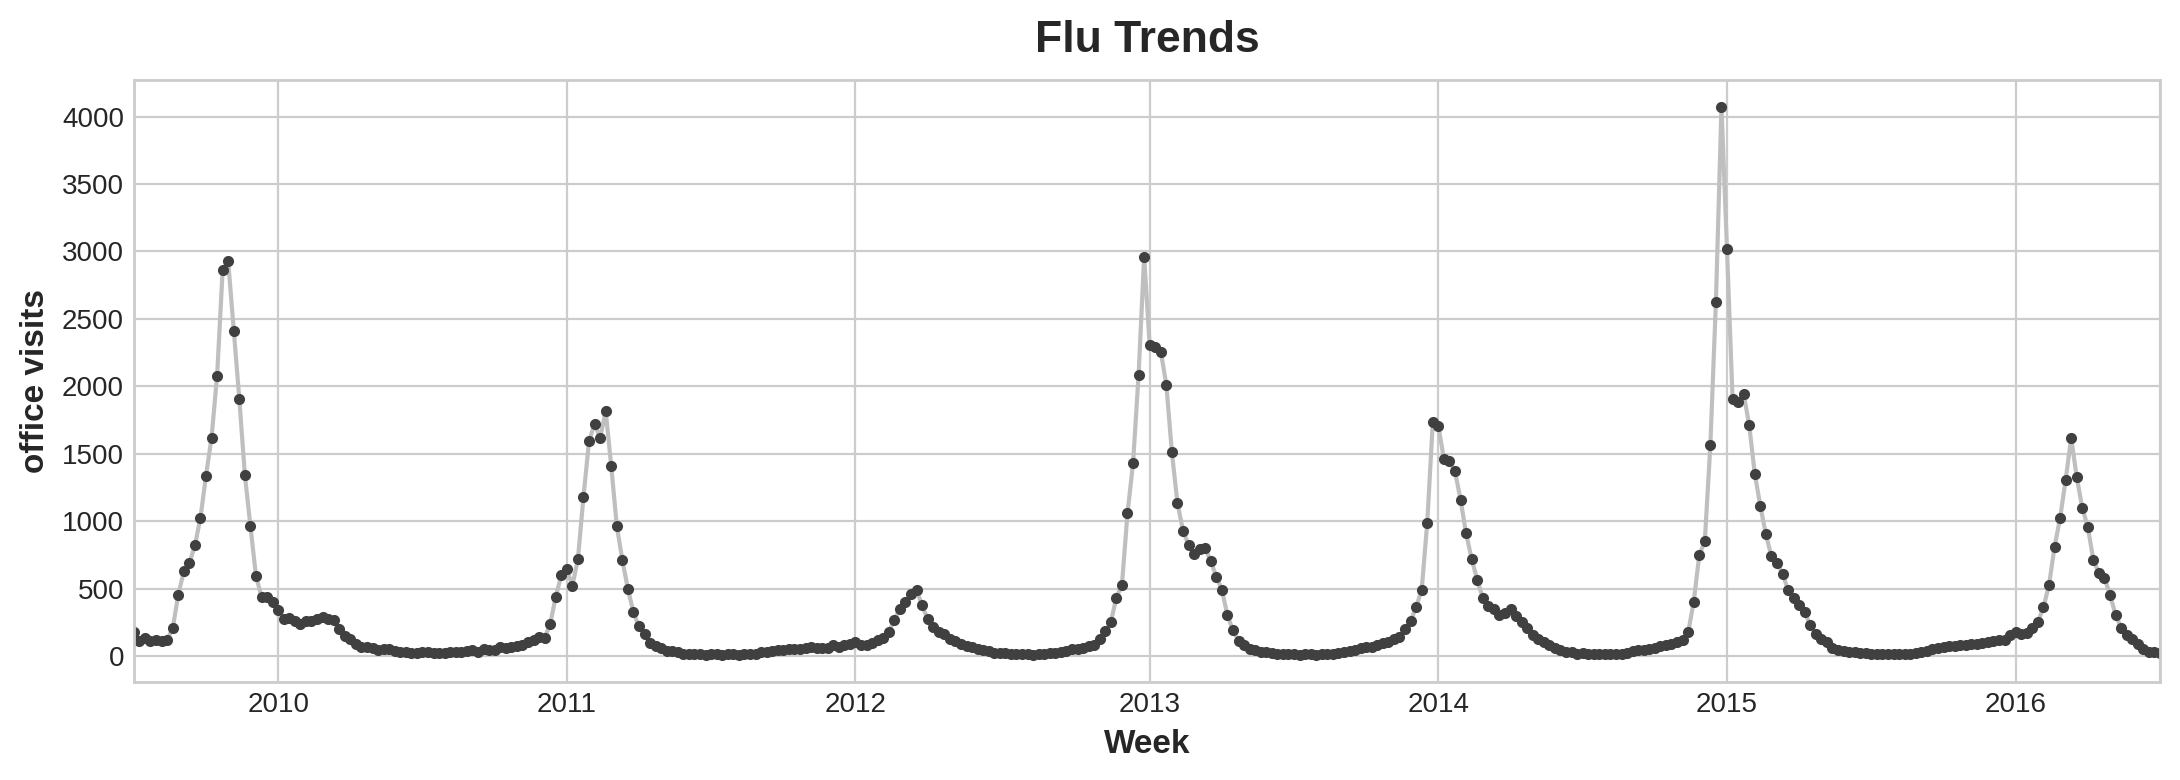

In [55]:
ax = df.FluVisits.plot(title = 'Flu Trends', **plot_params)
ax.set_ylabel('office visits')

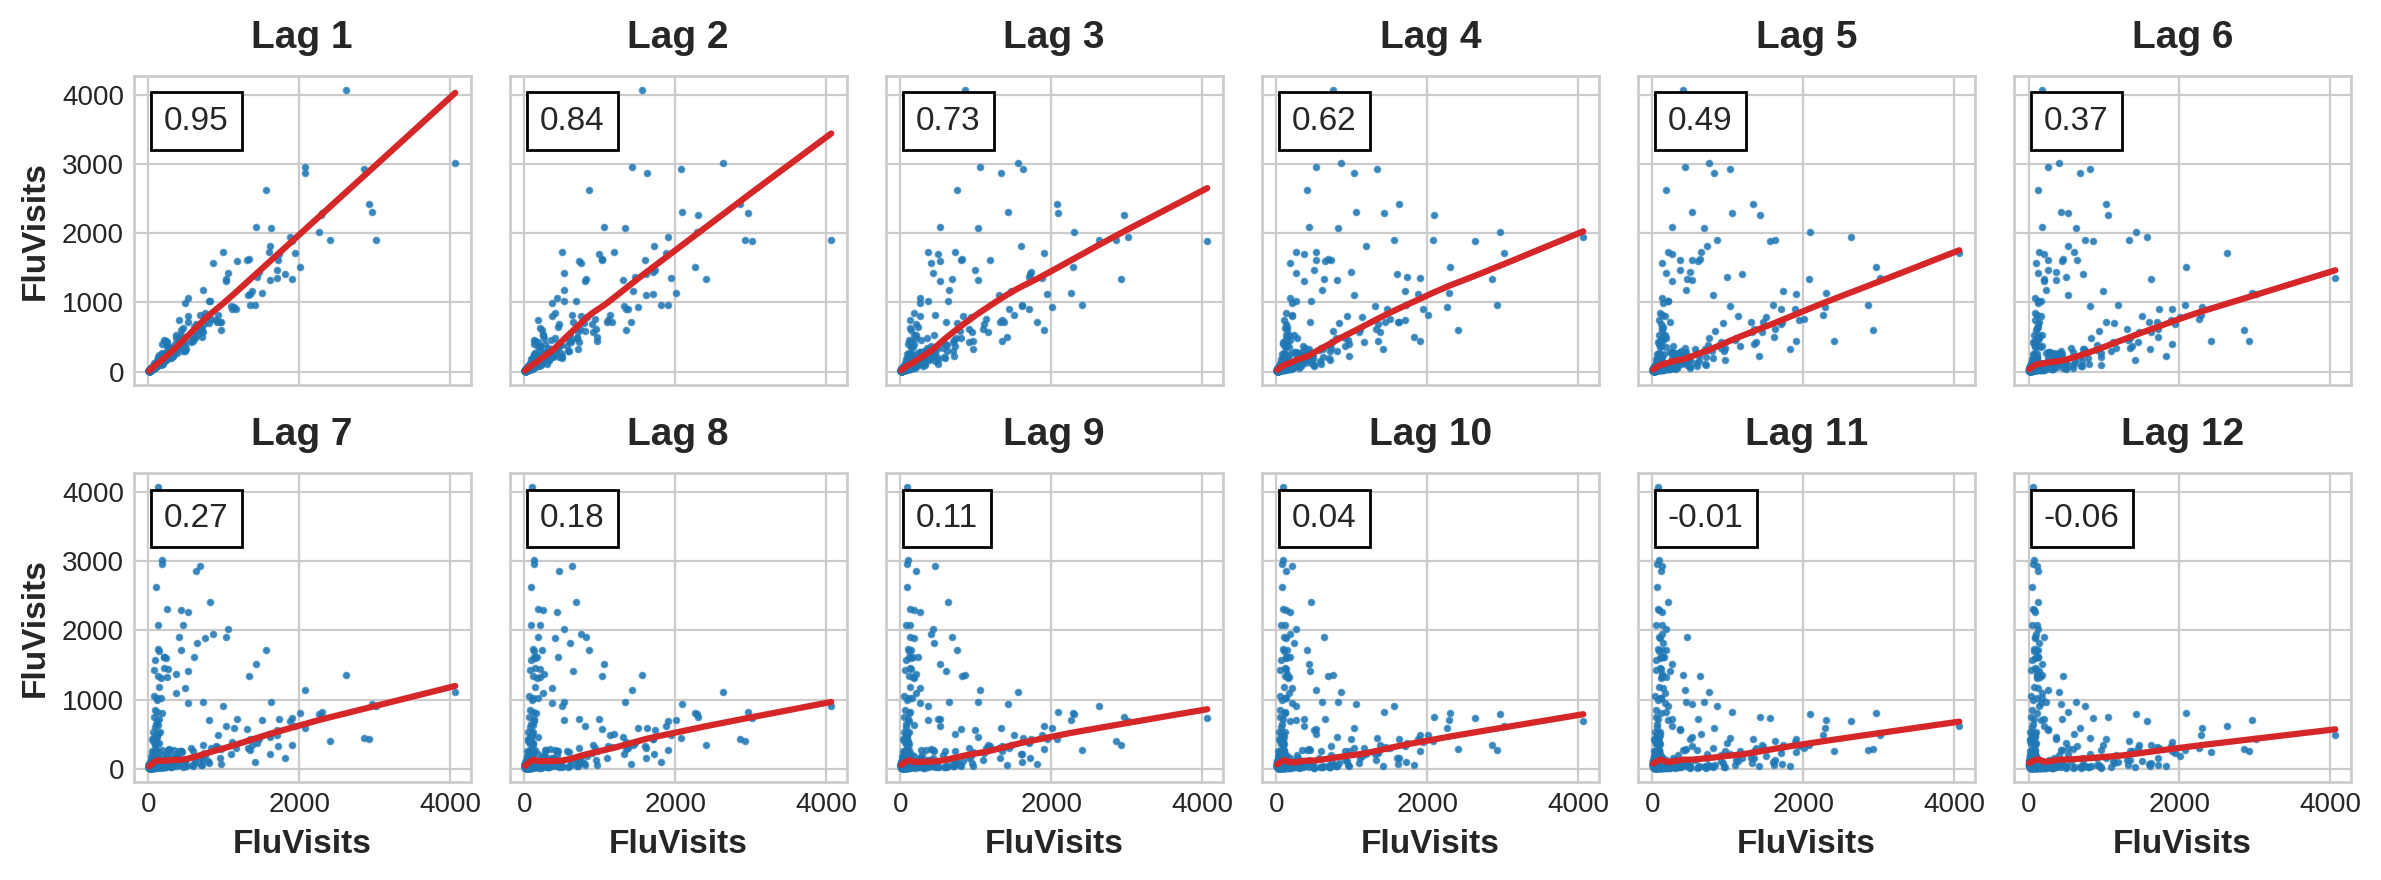

In [56]:
_ = plot_lags(df.FluVisits, lags = 12, nrows = 2)

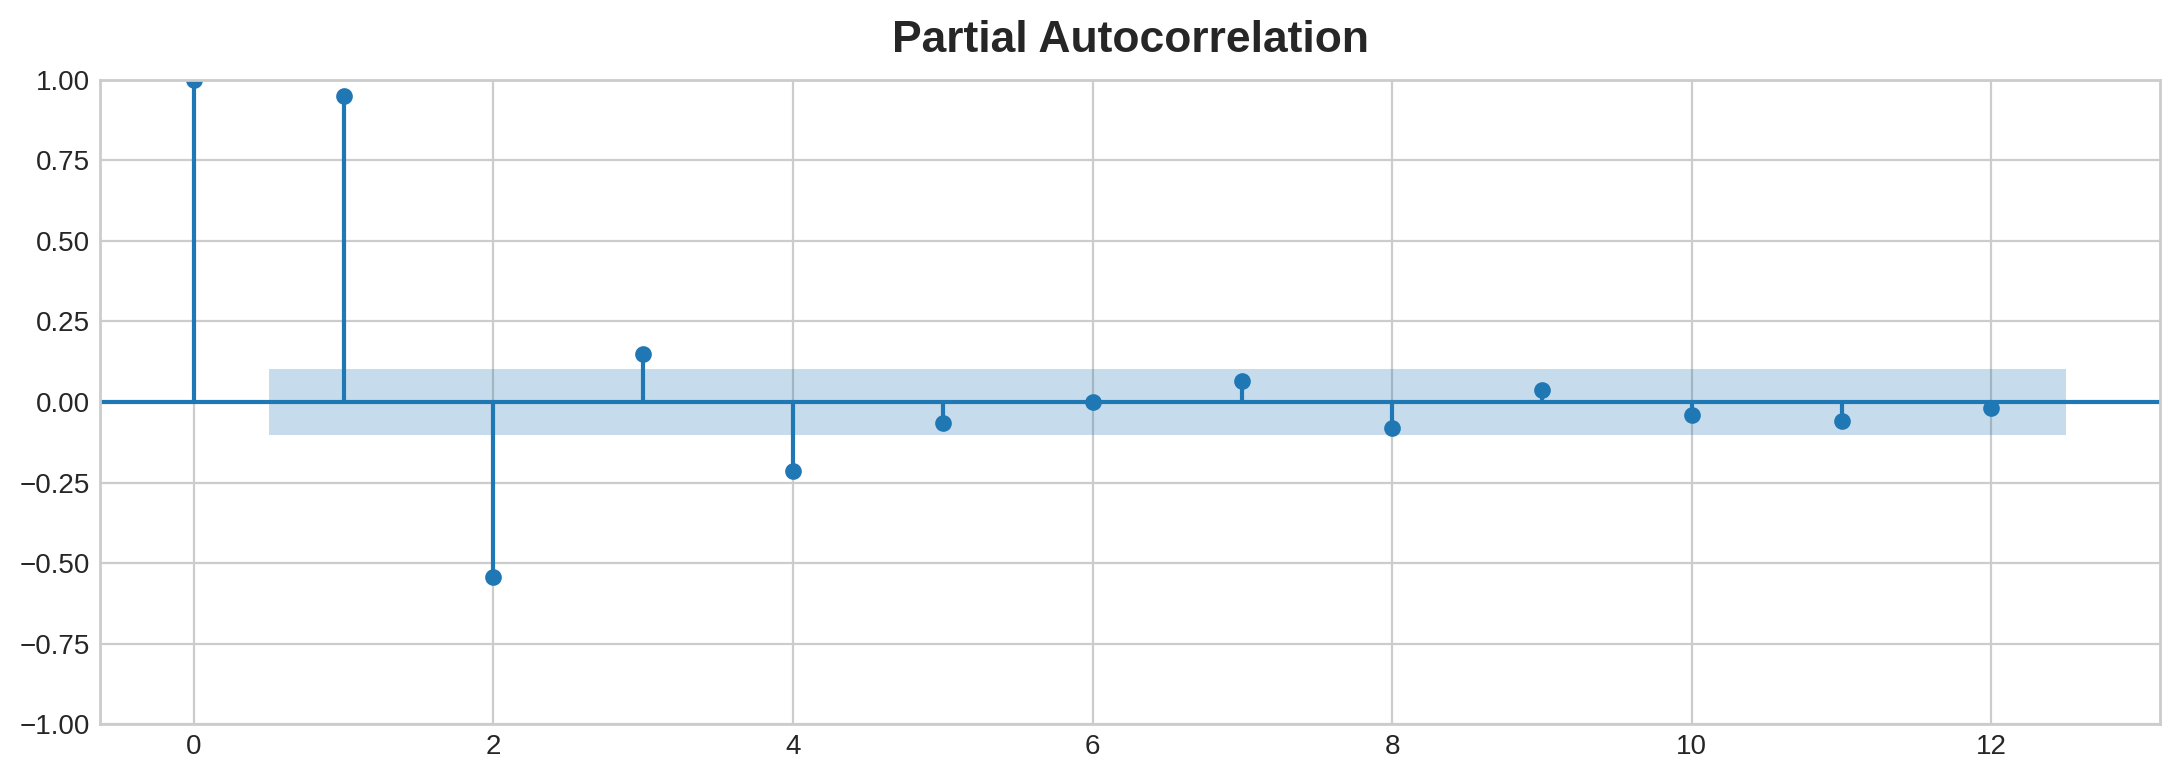

In [57]:
_ = plot_pacf(df.FluVisits, lags = 12)

In [58]:
def make_lags(ts, lags):
    return pd.concat(
        {
            f'y_lag_{i}':ts.shift(i) for i in range(1, lags + 1)
        },
        axis = 1
    )
x = make_lags(df.FluVisits, lags = 4)
x = x.fillna(0.0)
y = df.FluVisits.copy()
x.head()

y_lag_1  y_lag_2  y_lag_3  y_lag_4
Week                                                     
2009-06-29/2009-07-05      0.0      0.0      0.0      0.0
2009-07-06/2009-07-12    180.0      0.0      0.0      0.0
2009-07-13/2009-07-19    115.0    180.0      0.0      0.0
2009-07-20/2009-07-26    132.0    115.0    180.0      0.0
2009-07-27/2009-08-02    109.0    132.0    115.0    180.0

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 60, shuffle = False)

In [60]:
model_5 = LinearRegression()
model_5.fit(x_train, y_train)

LinearRegression()

In [61]:
y_pred = pd.Series(model_5.predict(x_train), index = x_train.index)
y_fore = pd.Series(model_5.predict(x_test), index = x_test.index)

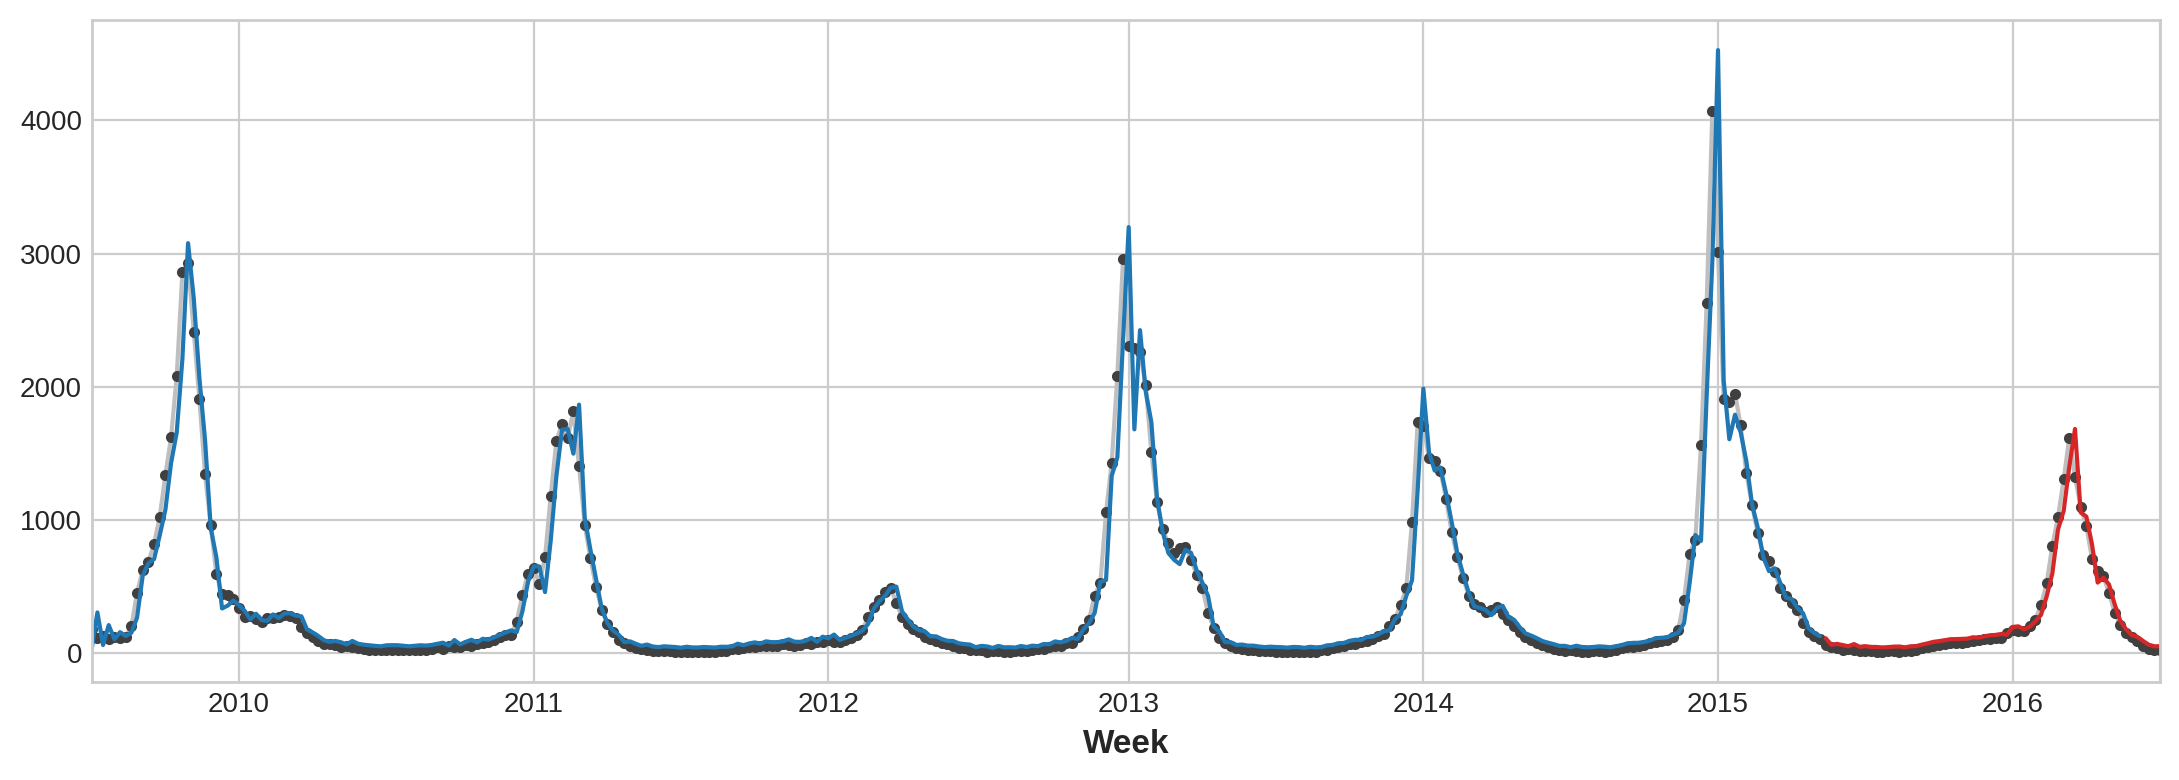

In [62]:
ax = y_train.plot(**plot_params)
ax = y_test.plot(**plot_params)
ax = y_pred.plot(ax=ax)
_ = y_fore.plot(ax=ax, color='C3')

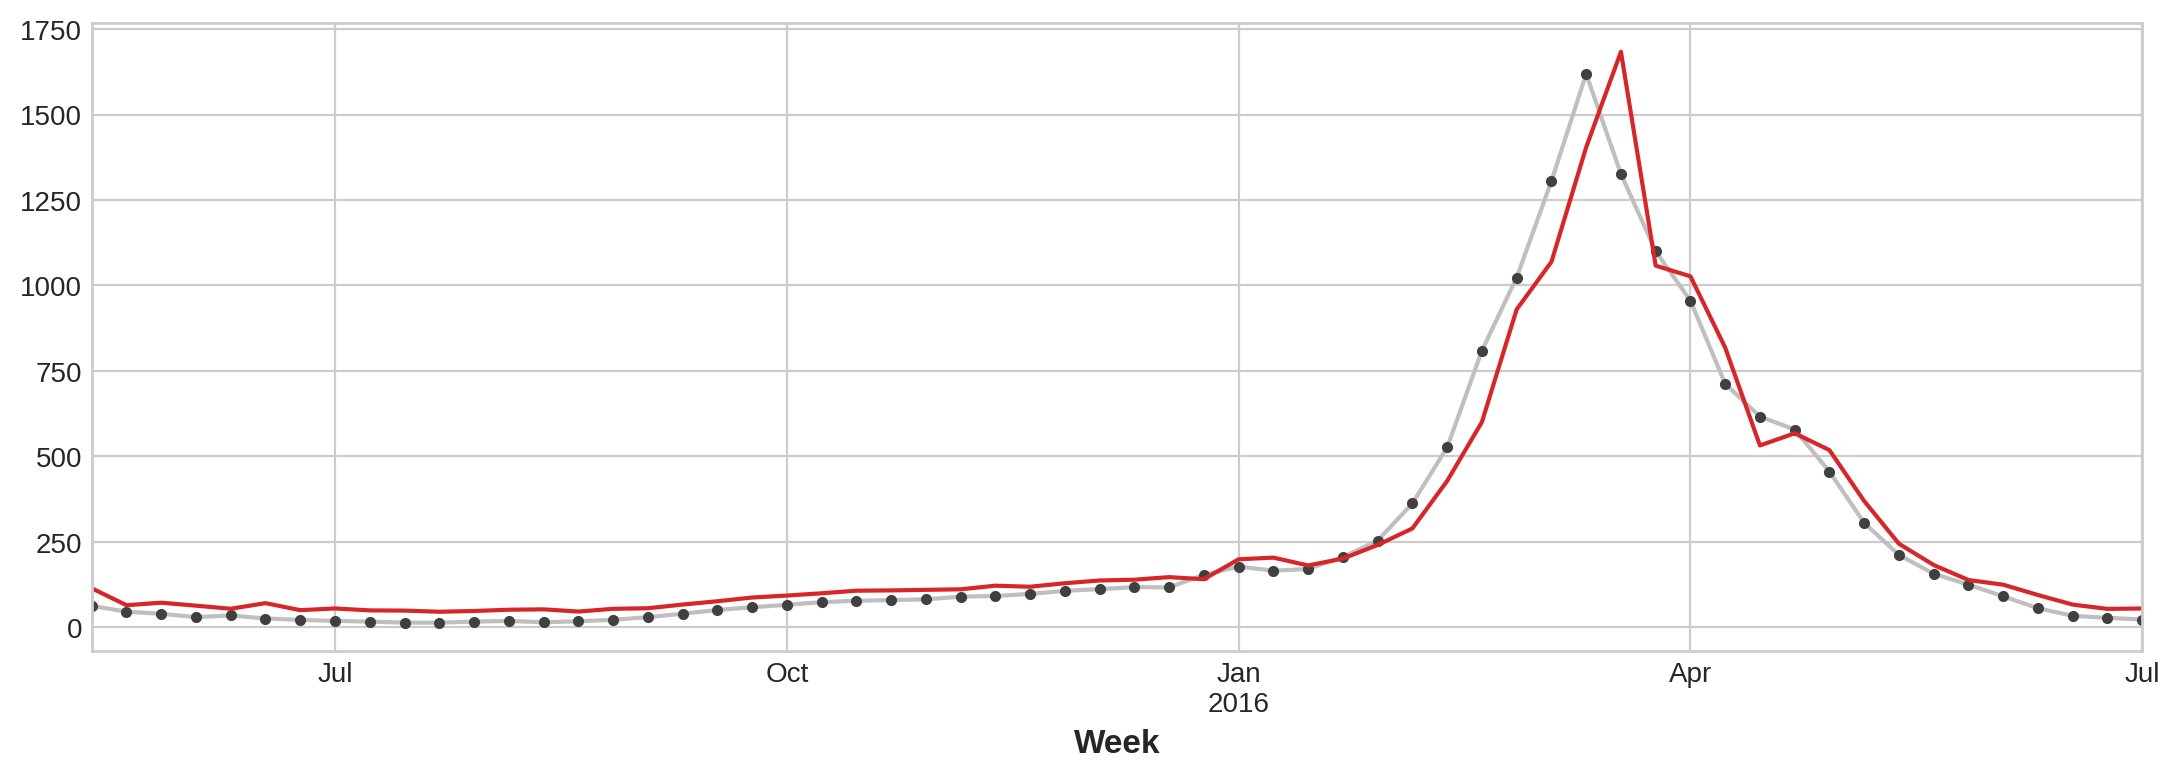

In [63]:
ax = y_test.plot(**plot_params)
_ = y_fore.plot(ax = ax, color = 'C3')

In [64]:
search_terms = ["FluContagious", "FluCough", "FluFever", "InfluenzaA", "TreatFlu",
                 "IHaveTheFlu", "OverTheCounterFlu", "HowLongFlu"]
x0 = make_lags(df[search_terms], lags = 3)
x0.columns = [' '.join(col).strip() for col in x0.columns.values]
x1 = make_lags(df['FluVisits'], lags = 4)
x = pd.concat([x0, x1], axis = 1)
x = x.fillna(0.0)
x.head()

y_lag_1 FluContagious  y_lag_1 FluCough  \
Week                                                             
2009-06-29/2009-07-05                    0.0               0.0   
2009-07-06/2009-07-12                    5.0              16.0   
2009-07-13/2009-07-19                    6.0              14.0   
2009-07-20/2009-07-26                    6.0              13.0   
2009-07-27/2009-08-02                    5.0              13.0   

                       y_lag_1 FluFever  y_lag_1 InfluenzaA  y_lag_1 TreatFlu  \
Week                                                                            
2009-06-29/2009-07-05               0.0                 0.0               0.0   
2009-07-06/2009-07-12              15.0                36.0               6.0   
2009-07-13/2009-07-19              15.0                25.0              12.0   
2009-07-20/2009-07-26              13.0                24.0               8.0   
2009-07-27/2009-08-02              12.0                23.0               5.0   

                       y_lag_1 IHaveTheFlu  y_lag_1 OverTheCounterFlu  \
Week                                                                    
2009-06-29/2009-07-05                  0.0                        0.0   
2009-07-06/2009-07-12                  5.0                       11.0   
2009-07-13/2009-07-19                  7.0                        7.0   
2009-07-20/2009-07-26                  8.0                        7.0   
2009-07-27/2009-08-02                  4.0                        6.0   

                       y_lag_1 HowLongFlu  y_lag_2 FluContagious  \
Week                                                               
2009-06-29/2009-07-05                 0.0                    0.0   
2009-07-06/2009-07-12                 6.0                    0.0   
2009-07-13/2009-07-19                 7.0                    5.0   
2009-07-20/2009-07-26                 7.0                    6.0   
2009-07-27/2009-08-02                 6.0                    6.0   

                       y_lag_2 FluCough  ...  y_lag_3 FluFever  \
Week                                     ...                     
2009-06-29/2009-07-05               0.0  ...               0.0   
2009-07-06/2009-07-12               0.0  ...               0.0   
2009-07-13/2009-07-19              16.0  ...               0.0   
2009-07-20/2009-07-26              14.0  ...              15.0   
2009-07-27/2009-08-02              13.0  ...              15.0   

                       y_lag_3 InfluenzaA  y_lag_3 TreatFlu  \
Week                                                          
2009-06-29/2009-07-05                 0.0               0.0   
2009-07-06/2009-07-12                 0.0               0.0   
2009-07-13/2009-07-19                 0.0               0.0   
2009-07-20/2009-07-26                36.0               6.0   
2009-07-27/2009-08-02                25.0              12.0   

                       y_lag_3 IHaveTheFlu  y_lag_3 OverTheCounterFlu  \
Week                                                                    
2009-06-29/2009-07-05                  0.0                        0.0   
2009-07-06/2009-07-12                  0.0                        0.0   
2009-07-13/2009-07-19                  0.0                        0.0   
2009-07-20/2009-07-26                  5.0                       11.0   
2009-07-27/2009-08-02                  7.0                        7.0   

                       y_lag_3 HowLongFlu  y_lag_1  y_lag_2  y_lag_3  y_lag_4  
Week                                                                           
2009-06-29/2009-07-05                 0.0      0.0      0.0      0.0      0.0  
2009-07-06/2009-07-12                 0.0    180.0      0.0      0.0      0.0  
2009-07-13/2009-07-19                 0.0    115.0    180.0      0.0      0.0  
2009-07-20/2009-07-26                 6.0    132.0    115.0    180.0      0.0  
2009-07-27/2009-08-02                 7.0    109.0    132.0    115.0    180.0  

[5 rows x 28 columns]

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 60, shuffle = False)

In [66]:
model_6 = LinearRegression()
model_6.fit(x_train, y_train)

LinearRegression()

In [67]:
y_fore = pd.Series(model_6.predict(x_test), index = y_test.index)

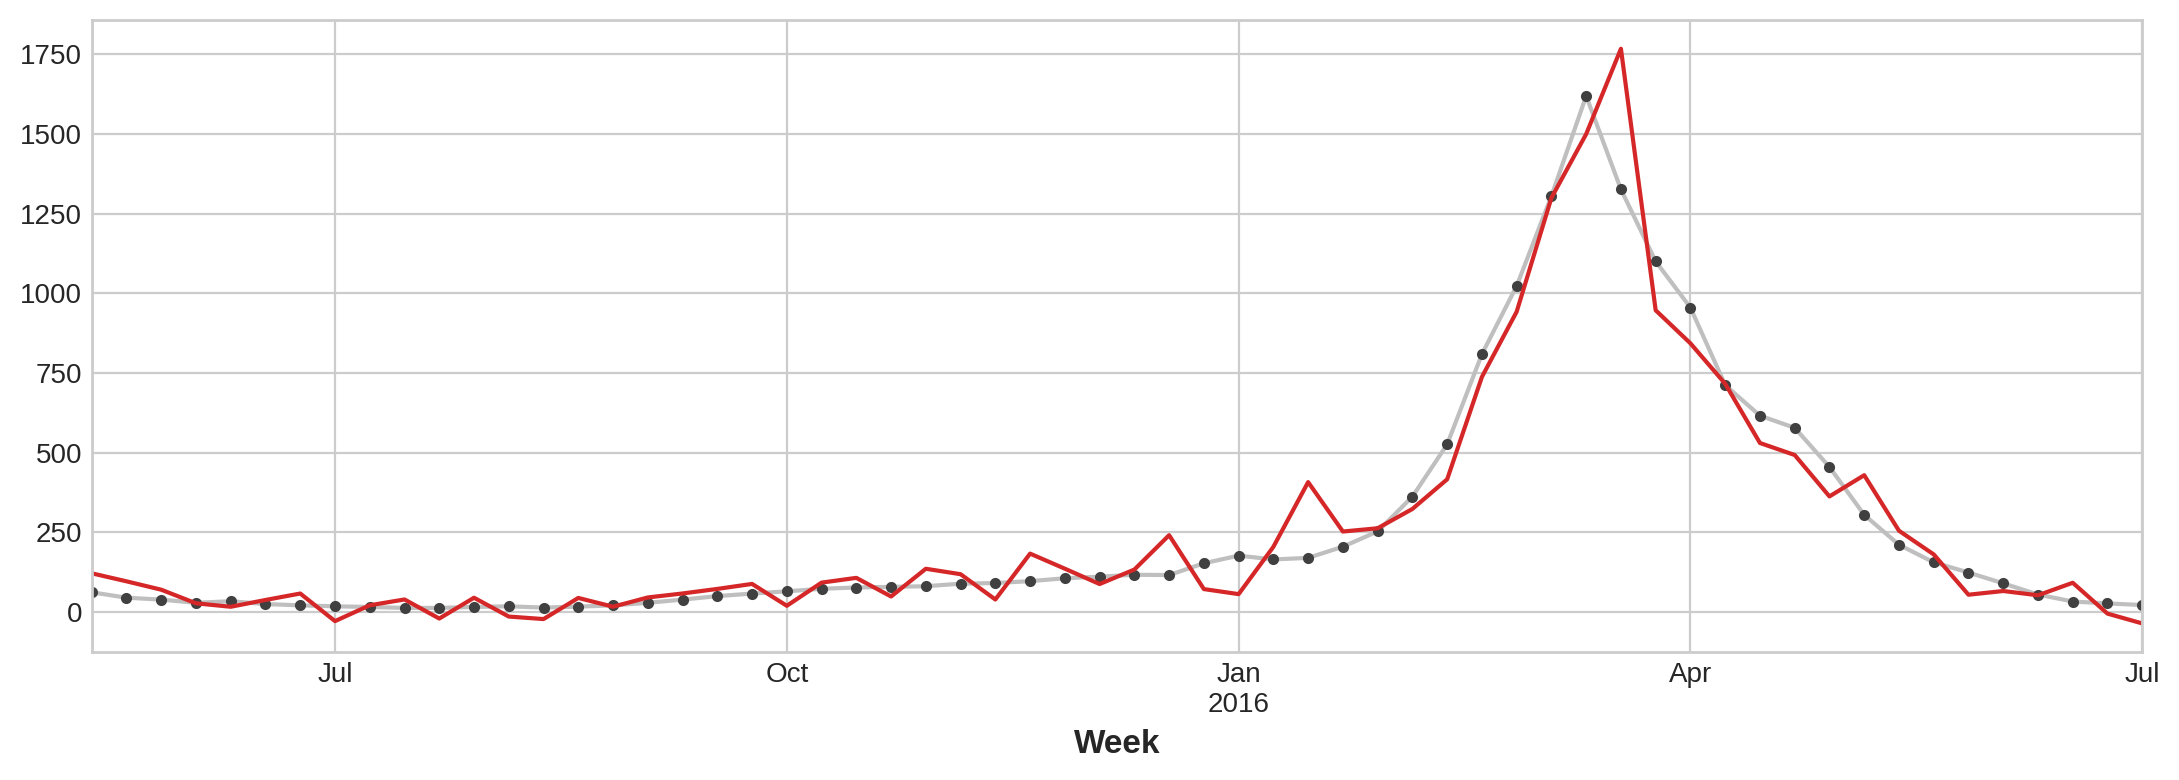

In [68]:
ax = y_test.plot(**plot_params)
_ = y_fore.plot(ax = ax, color = 'C3')

### Hyprid Models

In [69]:
industries = ['BuildingMaterials', 'FoodAndBeverage']
retail = pd.read_csv('us-retail-sales.csv',
                     usecols = ['Month'] + industries,
                     parse_dates = ['Month'],
                     index_col = 'Month').to_period('D').reindex(columns = industries)
retail.head()

BuildingMaterials  FoodAndBeverage
Month                                         
1992-01-01               8964            29589
1992-02-01               9023            28570
1992-03-01              10608            29682
1992-04-01              11630            30228
1992-05-01              12327            31677

In [70]:
retail = pd.concat({'Sales': retail}, names = [None, 'Industries'],axis = 1)
retail.head()

Sales                
Industries BuildingMaterials FoodAndBeverage
Month                                       
1992-01-01              8964           29589
1992-02-01              9023           28570
1992-03-01             10608           29682
1992-04-01             11630           30228
1992-05-01             12327           31677

In [71]:
retail.shape

(336, 2)

In [72]:
y = retail.copy()
dp = DeterministicProcess(
    index = y.index,
    constant = True,
    order = 2,
    drop = True
)
x = dp.in_sample()

In [73]:
idx_train, idx_test = train_test_split(
    y.index, test_size=12 * 4, shuffle=False,
)
x_train, x_test = x.loc[idx_train, :], x.loc[idx_test, :]
y_train, y_test = y.loc[idx_train], y.loc[idx_test]

In [74]:
model_trend = LinearRegression(fit_intercept = False)
model_trend.fit(x_train, y_train)

LinearRegression(fit_intercept=False)

In [75]:
y_fit = pd.DataFrame(data = model_trend.predict(x_train),
                     index = y_train.index,
                     columns = y_train.columns)
y_fit.head()

Sales                
Industries BuildingMaterials FoodAndBeverage
Month                                       
1992-01-01       9192.966040    30384.413252
1992-02-01       9324.354900    30430.803516
1992-03-01       9455.202650    30477.545559
1992-04-01       9585.509289    30524.639380
1992-05-01       9715.274818    30572.084979

In [76]:
y_pred = pd.DataFrame(data = model_trend.predict(x_test),
                      index = y_test.index,
                      columns = y_test.columns)
y_pred.head()

Sales                
Industries BuildingMaterials FoodAndBeverage
Month                                       
2016-01-01      24669.950487    58283.115113
2016-02-01      24645.499575    58430.817613
2016-03-01      24620.507554    58578.871891
2016-04-01      24594.974421    58727.277948
2016-05-01      24568.900179    58876.035784

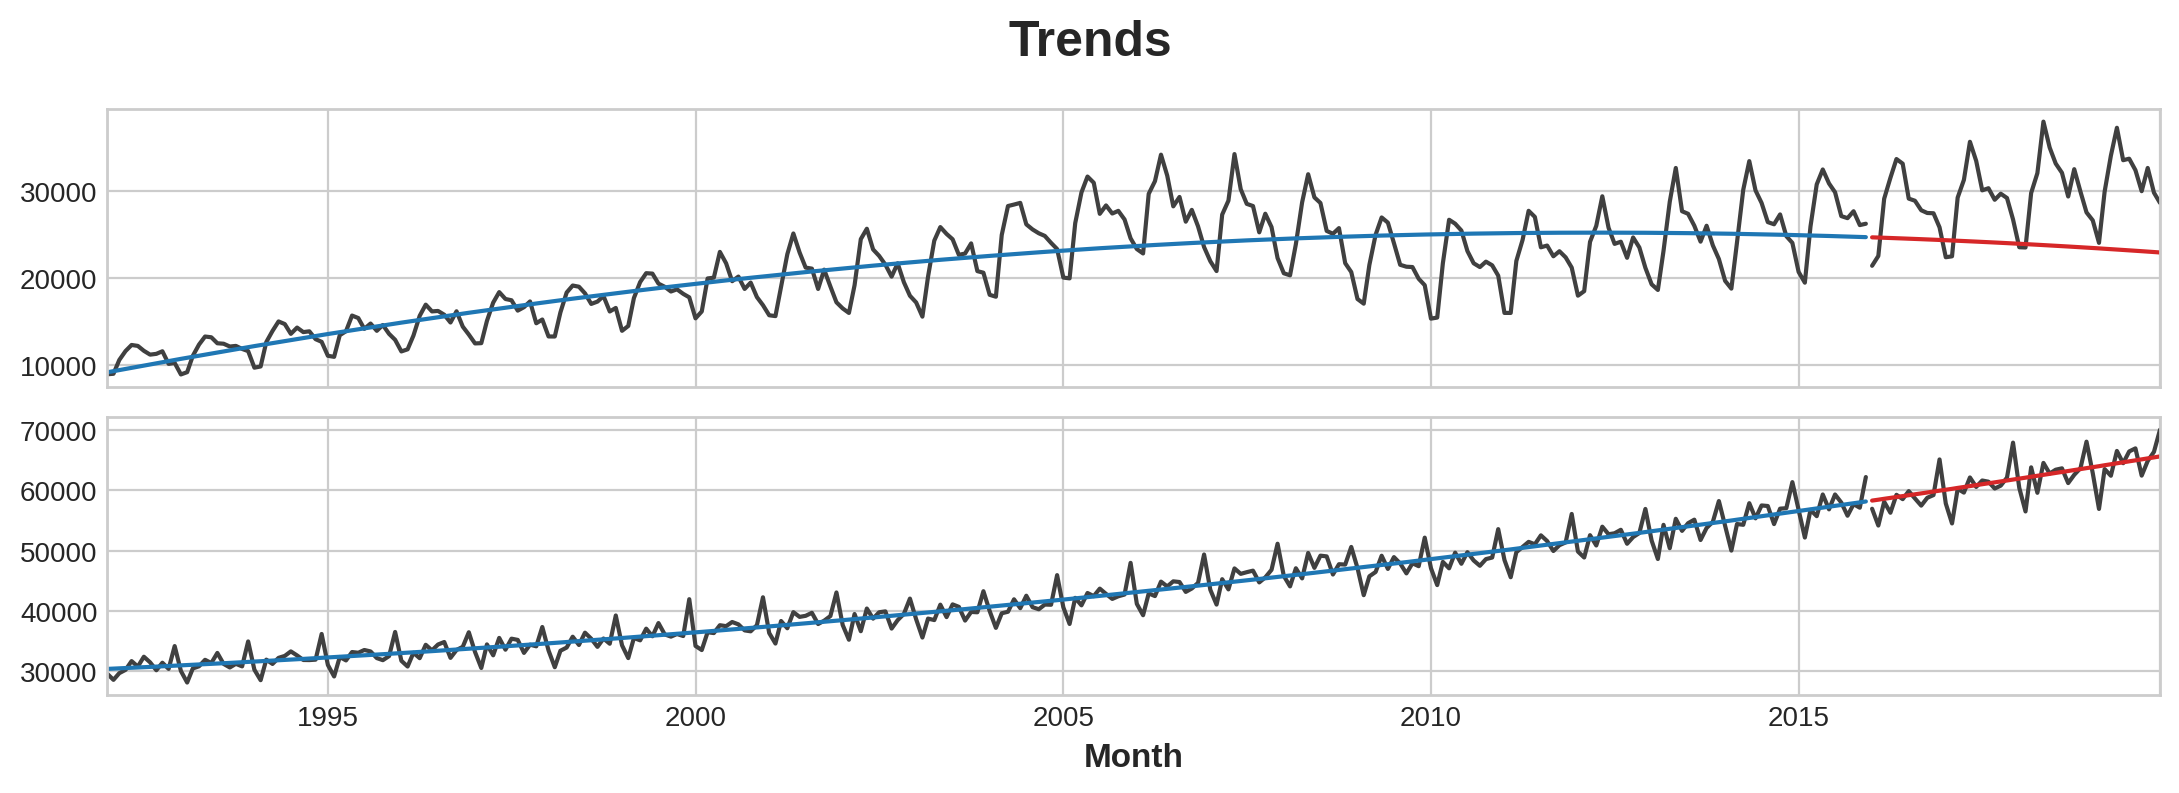

In [77]:
axs = y_train.plot(color = '0.25', subplots = True, sharex = True)
axs = y_test.plot(color = '0.25', subplots = True, sharex = True, ax = axs)
axs = y_fit.plot(color = 'C0', subplots = True, sharex = True, ax = axs)
axs = y_pred.plot(color = 'C3', subplots = True, sharex = True, ax = axs)
for ax in axs:
    ax.legend([])
    _ = plt.suptitle('Trends')


In [78]:
x = retail.stack()
display(x.head())
y = x.pop('Sales')

Sales
Month      Industries              
1992-01-01 BuildingMaterials   8964
           FoodAndBeverage    29589
1992-02-01 BuildingMaterials   9023
           FoodAndBeverage    28570
1992-03-01 BuildingMaterials  10608

In [79]:
x = x.reset_index('Industries')
x.head()

Industries
Month                        
1992-01-01  BuildingMaterials
1992-01-01    FoodAndBeverage
1992-02-01  BuildingMaterials
1992-02-01    FoodAndBeverage
1992-03-01  BuildingMaterials

In [80]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x.Industries = le.fit_transform(x.Industries)
x['Month'] = x.index.month
x.head()

Industries  Month
Month                        
1992-01-01           0      1
1992-01-01           1      1
1992-02-01           0      2
1992-02-01           1      2
1992-03-01           0      3

In [81]:
x_train, x_test = x.loc[idx_train, :], x.loc[idx_test, :]
y_train, y_test = y.loc[idx_train], y.loc[idx_test]

In [82]:
y_fit = y_fit.stack().squeeze()
y_pred = y_pred.stack().squeeze()
y_resid = y_train - y_fit

from xgboost import XGBRegressor

model_xgb = XGBRegressor()
model_xgb.fit(x_train, y_resid)

y_fit_boosted = model_xgb.predict(x_train) + y_fit
y_pred_boosted = model_xgb.predict(x_test) + y_pred

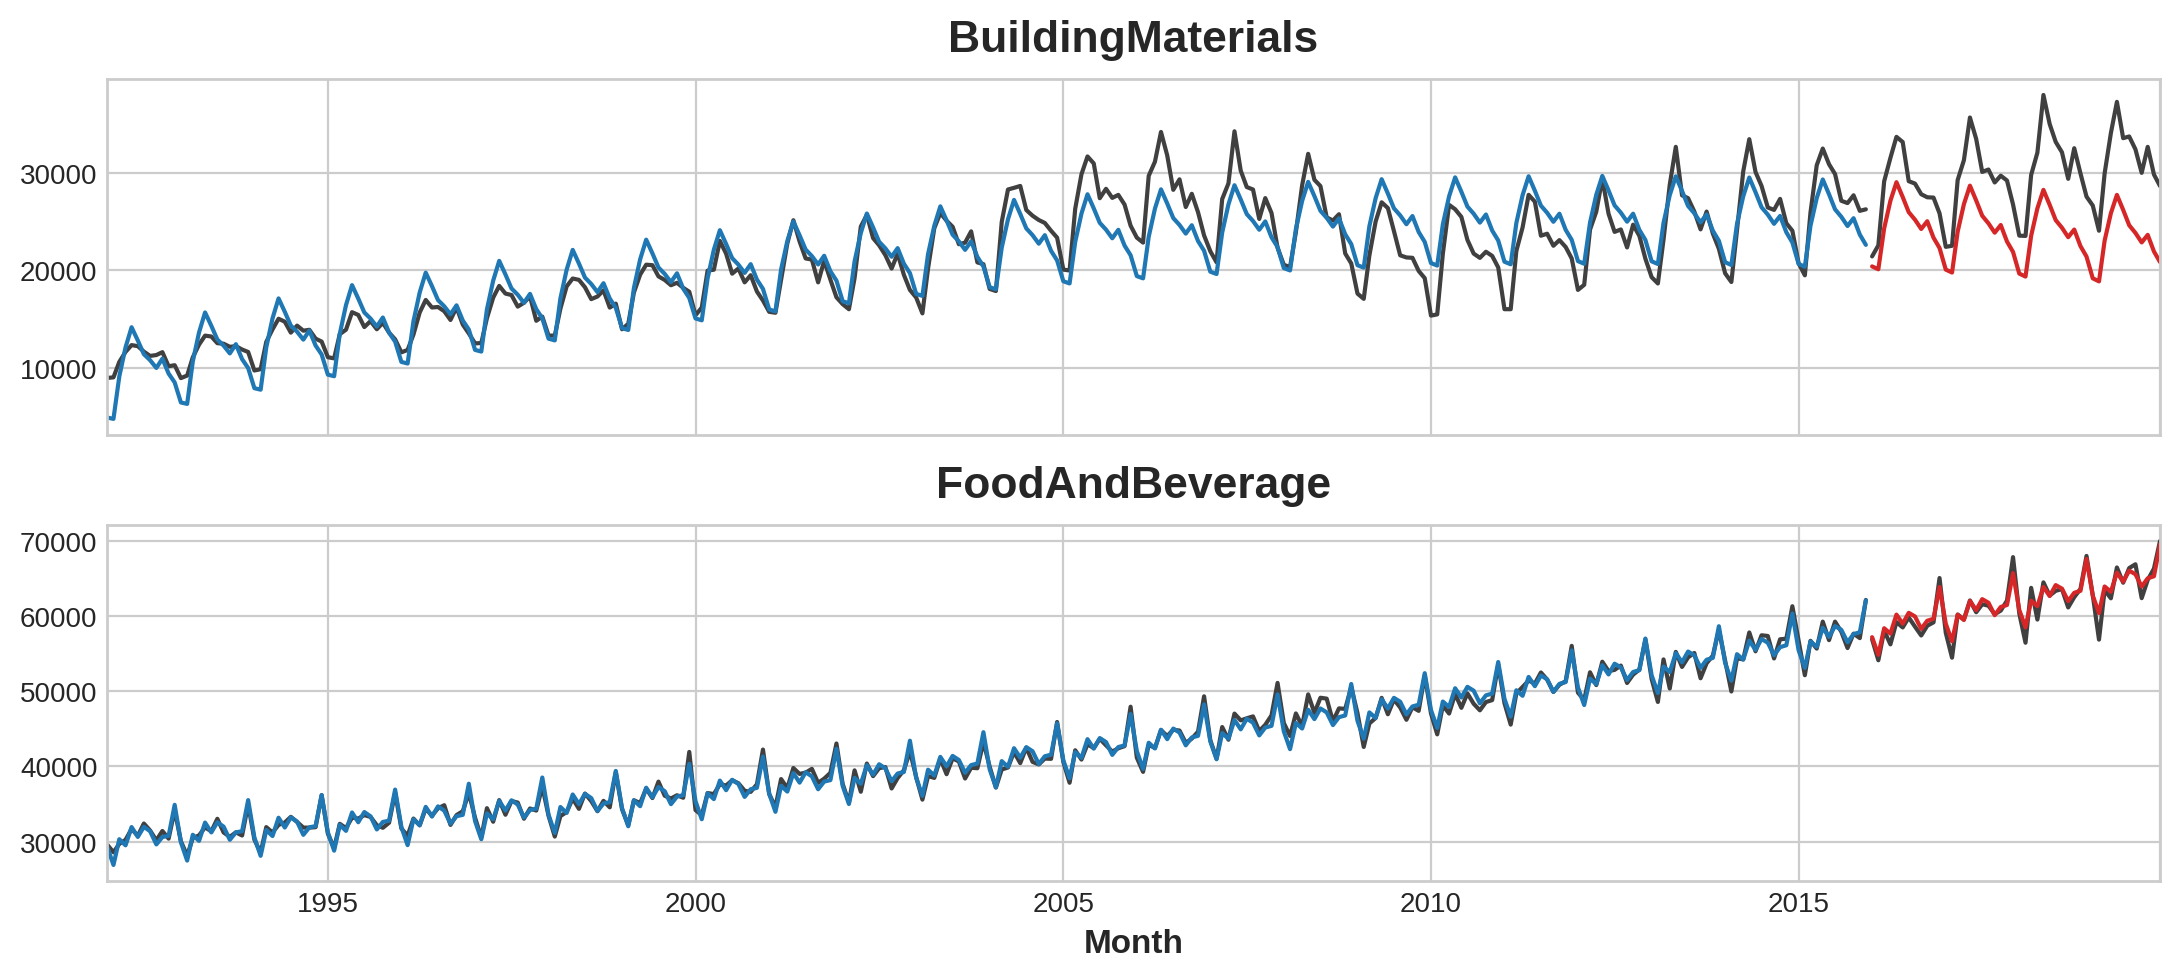

In [83]:
axs = y_train.unstack(['Industries']).plot(color = '0.25', subplots = True, sharex = True, figsize = (11, 5),
                                         title = ['BuildingMaterials', 'FoodAndBeverage'])
axs = y_test.unstack(['Industries']).plot(color = '0.25', subplots = True, sharex = True, ax = axs)
axs = y_fit_boosted.unstack(['Industries']).plot(color = 'C0', subplots = True, sharex = True, ax = axs)
axs = y_pred_boosted.unstack(['Industries']).plot(color = 'C3', subplots = True, sharex = True, ax = axs)

for ax in axs:
    ax.legend([])

### Forecasting With Machine Learning

In [84]:
flu_trends = pd.read_csv('flu-trends.csv')
flu_trends.set_index(
    pd.PeriodIndex(flu_trends.Week, freq="W"),
    inplace=True,
)
flu_trends.drop("Week", axis=1, inplace=True)
flu_trends.head()

AInfluenza  AcuteBronchitis  BodyTemperature  \
Week                                                                  
2009-06-29/2009-07-05          36               20               43   
2009-07-06/2009-07-12          25               19               40   
2009-07-13/2009-07-19          24               30               45   
2009-07-20/2009-07-26          23               19               40   
2009-07-27/2009-08-02          27               21               44   

                       BraunThermoscan  BreakAFever  Bronchitis  ChestCold  \
Week                                                                         
2009-06-29/2009-07-05               27           11          22         16   
2009-07-06/2009-07-12               31           10          21         11   
2009-07-13/2009-07-19               20           12          20         20   
2009-07-20/2009-07-26               15           10          19         12   
2009-07-27/2009-08-02               20           11          19         17   

                       ColdAndFlu  ColdOrFlu  ColdVersusFlu  ...  \
Week                                                         ...   
2009-06-29/2009-07-05           7          3              8  ...   
2009-07-06/2009-07-12           6          8              8  ...   
2009-07-13/2009-07-19           6          6              8  ...   
2009-07-20/2009-07-26           7         10             15  ...   
2009-07-27/2009-08-02           8         10             15  ...   

                       TreatingTheFlu  TreatmentForFlu  TreatmentForTheFlu  \
Week                                                                         
2009-06-29/2009-07-05              16                6                  13   
2009-07-06/2009-07-12              16                7                   8   
2009-07-13/2009-07-19              16                6                   9   
2009-07-20/2009-07-26               8                5                  12   
2009-07-27/2009-08-02               8                8                  12   

                       Tussin  Tussionex  TypeAInfluenza  UpperRespiratory  \
Week                                                                         
2009-06-29/2009-07-05      25         34              30                25   
2009-07-06/2009-07-12      27         32              27                28   
2009-07-13/2009-07-19      24         28              25                25   
2009-07-20/2009-07-26      21         26              26                29   
2009-07-27/2009-08-02      33         29              21                27   

                       WalkingPneumonia  WhatToDoIfYouHaveTheFlu  FluVisits  
Week                                                                         
2009-06-29/2009-07-05                24                       15        180  
2009-07-06/2009-07-12                29                        9        115  
2009-07-13/2009-07-19                25                        9        132  
2009-07-20/2009-07-26                24                       13        109  
2009-07-27/2009-08-02                30                        9        120  

[5 rows x 130 columns]

In [85]:
def plot_multistep(y, every=1, ax=None, palette_kwargs=None):
    palette_kwargs_ = dict(palette='husl', n_colors=16, desat=None)
    if palette_kwargs is not None:
        palette_kwargs_.update(palette_kwargs)
    palette = sns.color_palette(**palette_kwargs_)
    if ax is None:
        fig, ax = plt.subplots()
    ax.set_prop_cycle(plt.cycler('color', palette))
    for date, preds in y[::every].iterrows():
        preds.index = pd.period_range(start=date, periods=len(preds))
        preds.plot(ax=ax)
    return ax

In [86]:
# First we'll prepare our target series (weekly office visits for the flu) for multistep forecasting
def make_lags(ts, lags, lead_time=1):
    return pd.concat(
        {
            f'y_lag_{i}': ts.shift(i)
            for i in range(lead_time, lags + lead_time)
        },
        axis=1)
y = flu_trends.FluVisits.copy()
x = make_lags(y, lags=4).fillna(0.0)

def make_multistep_target(ts, steps):
    return pd.concat(
        {f'y_step_{i + 1}': ts.shift(-i)
         for i in range(steps)},
        axis=1)
y = make_multistep_target(y, steps=8).dropna()

# Shifting has created indexes that don't match. Only keep times for
# which we have both targets and features
y, x = y.align(x, join='inner', axis=0)


In [87]:
# We'll use linear regression as a MultiOutput strategy
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=False)

model = LinearRegression()
model.fit(x_train, y_train)

y_fit = pd.DataFrame(model.predict(x_train), index=x_train.index, columns=y.columns)
y_pred = pd.DataFrame(model.predict(x_test), index=x_test.index, columns=y.columns)

In [88]:
from sklearn.metrics import mean_squared_error
train_rmse = mean_squared_error(y_train, y_fit, squared=False)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print((f"Train RMSE: {train_rmse:.2f}\n" f"Test RMSE: {test_rmse:.2f}"))

Train RMSE: 389.12
Test RMSE: 582.33


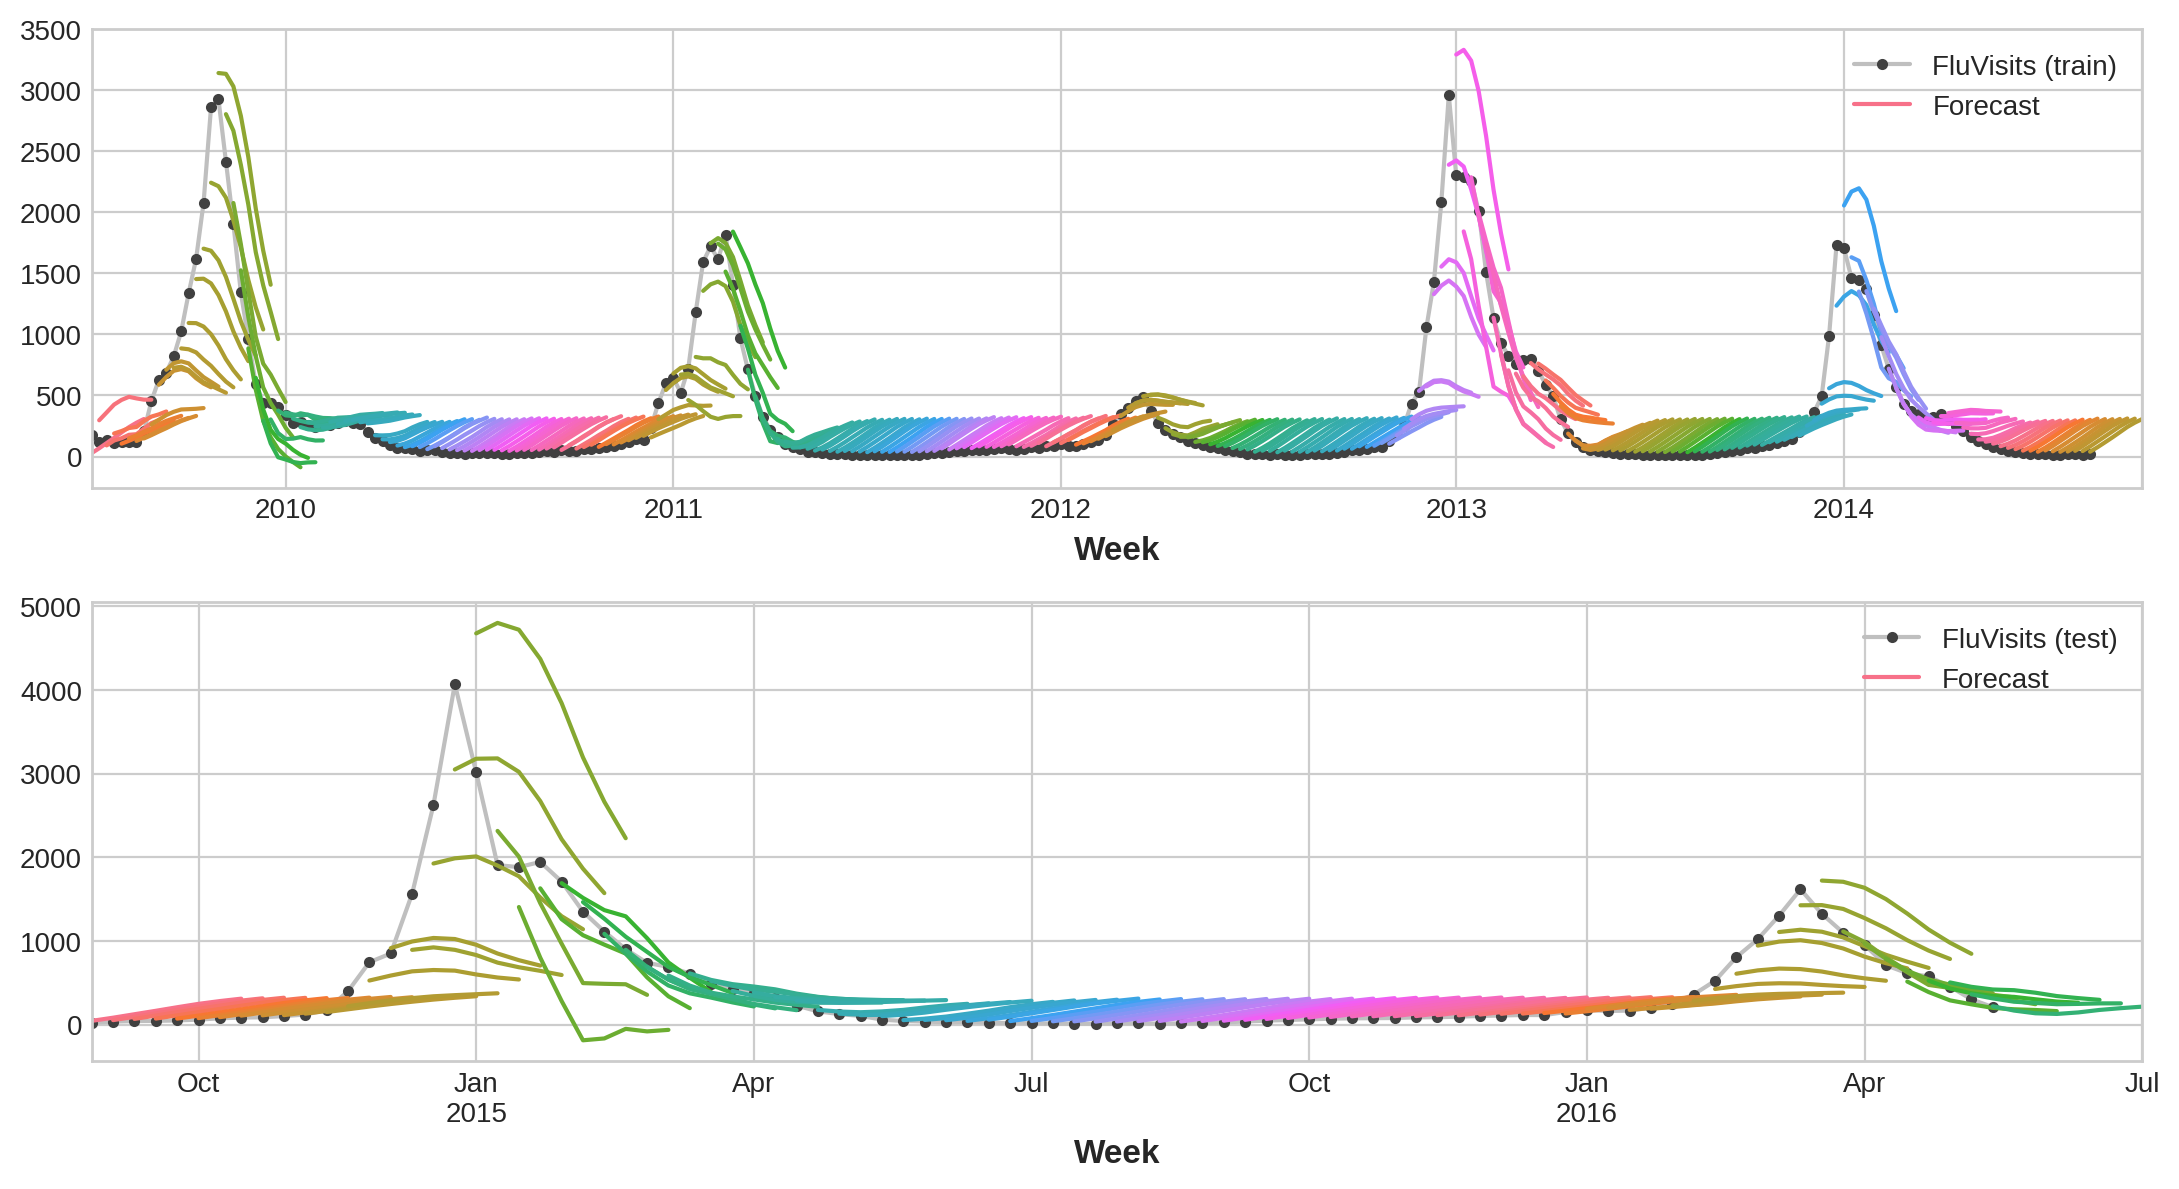

In [89]:
palette = dict(palette='husl', n_colors=64)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11, 6))
ax1 = flu_trends.FluVisits[y_fit.index].plot(**plot_params, ax=ax1)
ax1 = plot_multistep(y_fit, ax=ax1, palette_kwargs=palette)
_ = ax1.legend(['FluVisits (train)', 'Forecast'])
ax2 = flu_trends.FluVisits[y_pred.index].plot(**plot_params, ax=ax2)
ax2 = plot_multistep(y_pred, ax=ax2, palette_kwargs=palette)
_ = ax2.legend(['FluVisits (test)', 'Forecast'])

In [90]:
# Direct strategy
# XGBoost can't produce multiple outputs for regression tasks.
# But by applying the Direct reduction strategy, we can still use it to produce multi-step forecasts.
from sklearn.multioutput import MultiOutputRegressor

model = MultiOutputRegressor(XGBRegressor())
model.fit(x_train, y_train)

y_fit = pd.DataFrame(model.predict(x_train), index=x_train.index, columns=y.columns)
y_pred = pd.DataFrame(model.predict(x_test), index=x_test.index, columns=y.columns)


In [91]:
train_rmse = mean_squared_error(y_train, y_fit, squared=False)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print((f"Train RMSE: {train_rmse:.2f}\n" f"Test RMSE: {test_rmse:.2f}"))

Train RMSE: 1.22
Test RMSE: 526.45


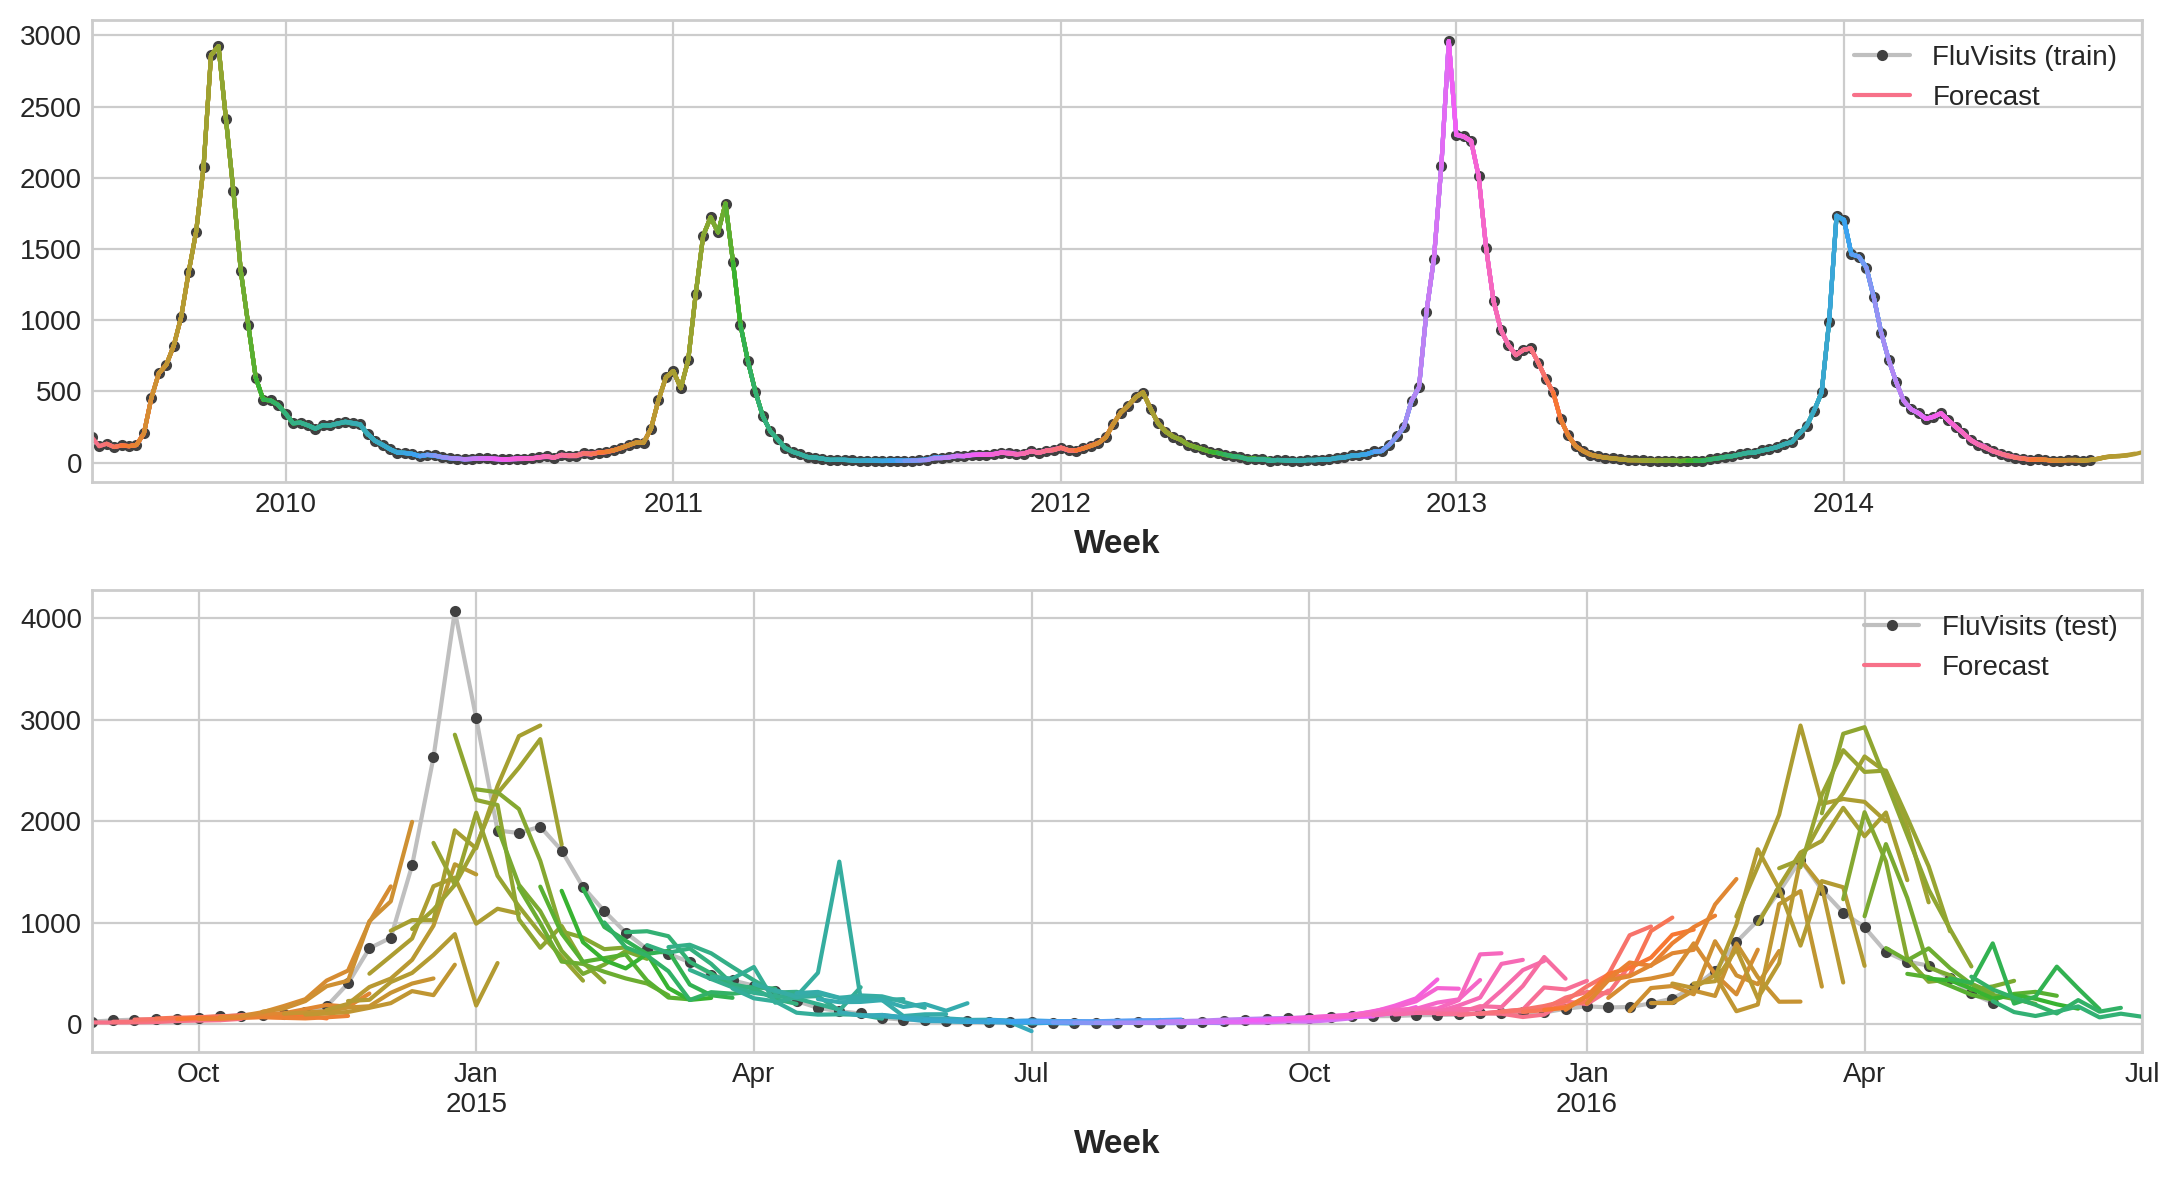

In [92]:
palette = dict(palette='husl', n_colors=64)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11, 6))
ax1 = flu_trends.FluVisits[y_fit.index].plot(**plot_params, ax=ax1)
ax1 = plot_multistep(y_fit, ax=ax1, palette_kwargs=palette)
_ = ax1.legend(['FluVisits (train)', 'Forecast'])
ax2 = flu_trends.FluVisits[y_pred.index].plot(**plot_params, ax=ax2)
ax2 = plot_multistep(y_pred, ax=ax2, palette_kwargs=palette)
_ = ax2.legend(['FluVisits (test)', 'Forecast'])

- XGBoost here is clearly overfitting on the training set. But on the test set it seems it was able to capture some of the dynamics of the flu season better than the linear regression model. It would likely do even better with some hyperparameter tuning.